In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

In [2]:
df = pd.read_csv('../data/수정 후 데이터/month_time_passengers.csv')
df.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,1시이후 승차,1시이후 하차
0,202112,1호선,동대문,803,15,12276,1913,8716,5492,13464,...,11616,11104,7600,8620,2617,7679,24,1355,0,0
1,202112,1호선,동묘앞,116,0,2423,756,3270,3915,5412,...,4328,4922,2608,3963,980,2491,10,1437,1,2
2,202112,1호선,서울역,769,16,8460,6094,11185,35735,34375,...,70343,32014,38334,18709,12519,8703,61,841,0,2
3,202112,1호선,시청,37,2,1902,4537,2827,19095,6322,...,45585,5417,21428,2794,5284,1713,28,153,0,1
4,202112,1호선,신설동,383,6,7270,2738,7731,10318,15891,...,11994,12367,6876,8680,2280,5913,37,863,0,0


## 1. 열차 이용객이 가장 많은 시간대 분석

### 1. 호선별로 가장 많이 승차하는 역은?

In [3]:
# 2017~2021년도 시간대별 평균 승차 인원수
df_in_passengers = df.groupby(['호선명', '지하철역'], group_keys=False)[df.columns[df.columns.str.contains('승차')]].mean()
df_in_passengers.head()

04시-05시 승차인원  05시-06시 승차인원  06시-07시 승차인원  07시-08시 승차인원  \
호선명 지하철역                                                              
1호선 가능         378.566667   7903.966667  12657.900000  24975.150000   
    가산디지털단지   1340.000000   8205.400000   7914.766667  14763.350000   
    간석         375.650000   5440.366667  11762.750000  26198.050000   
    개봉        1226.050000  18414.966667  36569.333333  95251.200000   
    관악         187.150000   6983.550000  13008.033333  34716.916667   

             08시-09시 승차인원  09시-10시 승차인원  10시-11시 승차인원  11시-12시 승차인원  \
호선명 지하철역                                                              
1호선 가능           23638.50  15203.016667  12468.350000  11413.266667   
    가산디지털단지      14539.55  11594.316667  10380.716667  10997.616667   
    간석           22571.60  12716.833333   9789.983333   9361.316667   
    개봉           90883.65  54553.400000  38545.633333  34222.066667   
    관악           33257.35  17020.783333  11564.533333  10261.366667   

             12시-13시 승차인원  13시-14시 승차인원  ...  16시-17시 승차인원  17시-18시 승차인원  \
호선명 지하철역                                 ...                               
1호선 가능       11396.200000  10297.183333  ...   9408.133333  11904.933333   
    가산디지털단지  12513.066667  14100.000000  ...  21071.616667  50636.116667   
    간석        9559.716667   9258.916667  ...   8938.200000   9440.016667   
    개봉       35046.450000  33677.733333  ...  30417.050000  32939.283333   
    관악       12046.166667  11519.200000  ...  12228.200000  13637.950000   

              18시-19시 승차인원  19시-20시 승차인원  20시-21시 승차인원  21시-22시 승차인원  \
호선명 지하철역                                                               
1호선 가능        10438.883333   6907.316667   5042.433333   4362.666667   
    가산디지털단지  110261.866667  49507.783333  29847.500000  25568.883333   
    간석         9900.700000   6011.500000   4716.033333   4322.416667   
    개봉        33536.800000  21150.850000  16104.250000  14619.383333   
    관악        12179.150000   7554.000000   5467.800000   5186.383333   

             22시-23시 승차인원  23시-24시 승차인원  00시-01시 승차인원   1시이후 승차  
호선명 지하철역                                                         
1호선 가능        3276.916667   1441.250000    112.983333  0.050000  
    가산디지털단지  17028.533333   6963.900000    182.500000  0.700000  
    간석        3165.583333   1666.233333    146.683333  0.116667  
    개봉       10667.933333   4663.666667    175.616667  0.300000  
    관악        3273.933333   1254.416667     52.500000  0.066667  

[5 rows x 22 columns]

In [4]:
# column들에서 승차인원 제거
df_in_passengers.columns = df_in_passengers.columns.str.split(' ').str[0]

In [5]:
# df에 하루 총 승차인원 column추가
df_in_passengers['총 승차인원'] = df_in_passengers.sum(axis=1)
df_in_passengers.head()

04시-05시       05시-06시       06시-07시       07시-08시   08시-09시  \
호선명 지하철역                                                                       
1호선 가능        378.566667   7903.966667  12657.900000  24975.150000  23638.50   
    가산디지털단지  1340.000000   8205.400000   7914.766667  14763.350000  14539.55   
    간석        375.650000   5440.366667  11762.750000  26198.050000  22571.60   
    개봉       1226.050000  18414.966667  36569.333333  95251.200000  90883.65   
    관악        187.150000   6983.550000  13008.033333  34716.916667  33257.35   

                  09시-10시       10시-11시       11시-12시       12시-13시  \
호선명 지하철역                                                              
1호선 가능       15203.016667  12468.350000  11413.266667  11396.200000   
    가산디지털단지  11594.316667  10380.716667  10997.616667  12513.066667   
    간석       12716.833333   9789.983333   9361.316667   9559.716667   
    개봉       54553.400000  38545.633333  34222.066667  35046.450000   
    관악       17020.783333  11564.533333  10261.366667  12046.166667   

                  13시-14시  ...       17시-18시        18시-19시       19시-20시  \
호선명 지하철역                   ...                                              
1호선 가능       10297.183333  ...  11904.933333   10438.883333   6907.316667   
    가산디지털단지  14100.000000  ...  50636.116667  110261.866667  49507.783333   
    간석        9258.916667  ...   9440.016667    9900.700000   6011.500000   
    개봉       33677.733333  ...  32939.283333   33536.800000  21150.850000   
    관악       11519.200000  ...  13637.950000   12179.150000   7554.000000   

                  20시-21시       21시-22시       22시-23시      23시-24시  \
호선명 지하철역                                                             
1호선 가능        5042.433333   4362.666667   3276.916667  1441.250000   
    가산디지털단지  29847.500000  25568.883333  17028.533333  6963.900000   
    간석        4716.033333   4322.416667   3165.583333  1666.233333   
    개봉       16104.250000  14619.383333  10667.933333  4663.666667   
    관악        5467.800000   5186.383333   3273.933333  1254.416667   

                00시-01시      1시이후         총 승차인원  
호선명 지하철역                                          
1호선 가능       112.983333  0.050000  201486.200000  
    가산디지털단지  182.500000  0.700000  448042.516667  
    간석       146.683333  0.116667  181198.750000  
    개봉       175.616667  0.300000  659822.750000  
    관악        52.500000  0.066667  232469.550000  

[5 rows x 23 columns]

In [7]:
# 하루 총 탑승객이 300보다 작은 일자의 데이터 삭제
df_in = df_in_passengers.drop(df_in_passengers[ df_in_passengers['총 승차인원'] <= 300 ].index, axis=0)

In [8]:
# 그래프를 그리기 위한 변수 생성
x1, x2, x3 = [], [], []

# 각 호선별 총 승차인원 top5 출력
for i in range(1, 10):
    df_in_i = df_in.xs(f'{i}호선', level='호선명').sort_values('총 승차인원', ascending=False).head(5)
    
    print(f'{i}호선')
    print(df_in_i[['총 승차인원']])
    print('-------------------------------------')
    
    # 그래프 값 저장
    x1.append(f'{i}호선')
    x2.append(df_in_i.index[0])
    x3.append(df_in_i['총 승차인원'][0])
    
    # 각 호선별 승차인원이 가장 많은 역저장
    globals()["df_in_{}".format(i)] = df_in.xs(f'{i}호선', level='호선명').sort_values('총 승차인원', ascending=False).head(5)

1호선
            총 승차인원
지하철역              
영등포   1.313540e+06
수원    1.217994e+06
종각    1.144827e+06
용산    1.102222e+06
부천    1.090171e+06
-------------------------------------
2호선
                총 승차인원
지하철역                  
강남        2.671963e+06
잠실(송파구청)  2.298056e+06
홍대입구      2.008077e+06
신림        1.931418e+06
구로디지털단지   1.730418e+06
-------------------------------------
3호선
                    총 승차인원
지하철역                      
고속터미널         1.566454e+06
연신내           1.158865e+06
양재(서초구청)      1.097445e+06
남부터미널(예술의전당)  9.270609e+05
압구정           9.238327e+05
-------------------------------------
4호선
                총 승차인원
지하철역                  
혜화        1.084945e+06
수유(강북구청)  1.083468e+06
쌍문        9.063570e+05
명동        8.980246e+05
미아사거리     8.477693e+05
-------------------------------------
5호선
                    총 승차인원
지하철역                      
광화문(세종문화회관)  941533.816667
까치산          844665.233333
화곡           827380.350000
오목교(목동운동장앞)  669127.050000
여의도          663555.48

In [9]:
# 호선별 가장 많이 승차하는 역을 데이터 프레임으로 저장
df_in_max = pd.DataFrame({'호선명': x1, '지하철역': x2, '총 승차인원': x3})

In [10]:
df_in_max

,호선명,지하철역,총 승차인원
0,1호선,영등포,1.313540e+06
1,2호선,강남,2.671963e+06
2,3호선,고속터미널,1.566454e+06
3,4호선,혜화,1.084945e+06
4,5호선,광화문(세종문화회관),9.415338e+05
5,6호선,응암,5.051695e+05
6,7호선,가산디지털단지,1.134524e+06
7,8호선,암사,5.227060e+05
8,9호선,신논현,8.693739e+05


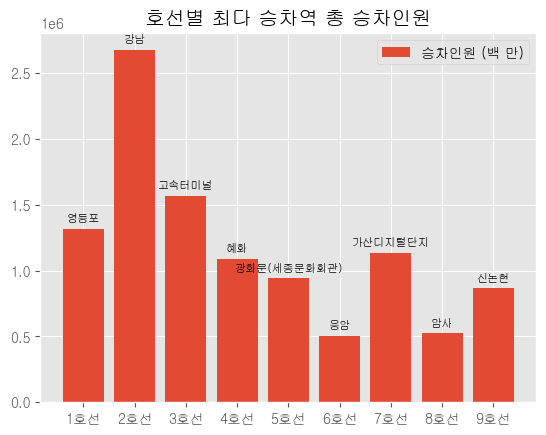

In [11]:
# 그래프
plt.style.use('ggplot')
plt.bar(df_in_max['호선명'], df_in_max['총 승차인원'], label="승차인원 (백 만)")
for i in range(9):
    plt.text(i, df_in_max.iloc[i]['총 승차인원']+80000, df_in_max.iloc[i]['지하철역'], va='center', ha='center', size=8)

plt.legend()
plt.title('호선별 최다 승차역 총 승차인원')

plt.show()

- 이 역의 가장 혼잡한 시간대는?

### 2. 호선별로 가장 많이 하차하는 역은?

In [12]:
# 2017~2021년도 시간대별 평균 하차 인원수
df_off_passengers = df.groupby(['호선명', '지하철역'], group_keys=False)[df.columns[df.columns.str.contains('하차')]].mean()
df_off_passengers.head()

04시-05시 하차인원  05시-06시 하차인원  06시-07시 하차인원  07시-08시 하차인원  \
호선명 지하철역                                                              
1호선 가능           6.050000   1626.133333   4374.083333   5366.183333   
    가산디지털단지      6.133333   1980.583333  10941.750000  46802.533333   
    간석          10.866667   1158.600000   2589.983333   4138.650000   
    개봉           8.633333   5494.800000  11855.966667  16530.883333   
    관악           1.800000   1931.716667   4626.450000   6062.566667   

              08시-09시 하차인원  09시-10시 하차인원  10시-11시 하차인원  11시-12시 하차인원  \
호선명 지하철역                                                               
1호선 가능        16129.050000   8418.733333   6858.433333   6510.516667   
    가산디지털단지  153276.750000  72598.500000  21970.766667  16996.766667   
    간석         8974.150000   5961.950000   5196.216667   5690.166667   
    개봉        26158.450000  20669.783333  17667.533333  20241.466667   
    관악        10607.266667  11114.666667  10735.233333   8128.400000   

             12시-13시 하차인원  13시-14시 하차인원  ...  16시-17시 하차인원  17시-18시 하차인원  \
호선명 지하철역                                 ...                               
1호선 가능        7152.233333   8397.616667  ...  11731.216667  14506.450000   
    가산디지털단지  16409.233333  17653.733333  ...  18747.833333  23332.466667   
    간석        6616.683333   7212.183333  ...  11038.183333  14301.233333   
    개봉       24447.716667  24229.850000  ...  43570.266667  59967.050000   
    관악        8069.283333   7915.516667  ...  11694.333333  15376.666667   

             18시-19시 하차인원  19시-20시 하차인원  20시-21시 하차인원  21시-22시 하차인원  \
호선명 지하철역                                                              
1호선 가능       19975.616667  19968.933333  13216.083333   9974.333333   
    가산디지털단지  27912.033333  22441.483333  13175.716667  13044.050000   
    간석       19304.766667  19758.183333  12610.466667  10974.983333   
    개봉       89897.233333  78656.183333  48984.700000  44434.883333   
    관악       27496.433333  24178.633333  14773.550000  14446.850000   

             22시-23시 하차인원  23시-24시 하차인원  00시-01시 하차인원   1시이후 하차  
호선명 지하철역                                                         
1호선 가능        9940.933333   6906.650000   1916.666667  1.650000  
    가산디지털단지  11600.800000   6686.566667   1090.016667  2.033333  
    간석       10211.350000   7005.550000   2437.116667  2.066667  
    개봉       39313.183333  24220.900000   3167.933333  2.283333  
    관악       12601.583333   8734.116667    980.500000  0.266667  

[5 rows x 22 columns]

In [13]:
# column들에서 하차인원 제거
df_off_passengers.columns = df_off_passengers.columns.str.split(' ').str[0]

In [14]:
# df에 하루 총 하차인원 column추가
df_off_passengers['총 하차인원'] = df_off_passengers.sum(axis=1)
df_off_passengers.head()

04시-05시      05시-06시       06시-07시       07시-08시  \
호선명 지하철역                                                          
1호선 가능        6.050000  1626.133333   4374.083333   5366.183333   
    가산디지털단지   6.133333  1980.583333  10941.750000  46802.533333   
    간석       10.866667  1158.600000   2589.983333   4138.650000   
    개봉        8.633333  5494.800000  11855.966667  16530.883333   
    관악        1.800000  1931.716667   4626.450000   6062.566667   

                   08시-09시       09시-10시       10시-11시       11시-12시  \
호선명 지하철역                                                               
1호선 가능        16129.050000   8418.733333   6858.433333   6510.516667   
    가산디지털단지  153276.750000  72598.500000  21970.766667  16996.766667   
    간석         8974.150000   5961.950000   5196.216667   5690.166667   
    개봉        26158.450000  20669.783333  17667.533333  20241.466667   
    관악        10607.266667  11114.666667  10735.233333   8128.400000   

                  12시-13시       13시-14시  ...       17시-18시       18시-19시  \
호선명 지하철역                                 ...                               
1호선 가능        7152.233333   8397.616667  ...  14506.450000  19975.616667   
    가산디지털단지  16409.233333  17653.733333  ...  23332.466667  27912.033333   
    간석        6616.683333   7212.183333  ...  14301.233333  19304.766667   
    개봉       24447.716667  24229.850000  ...  59967.050000  89897.233333   
    관악        8069.283333   7915.516667  ...  15376.666667  27496.433333   

                  19시-20시       20시-21시       21시-22시       22시-23시  \
호선명 지하철역                                                              
1호선 가능       19968.933333  13216.083333   9974.333333   9940.933333   
    가산디지털단지  22441.483333  13175.716667  13044.050000  11600.800000   
    간석       19758.183333  12610.466667  10974.983333  10211.350000   
    개봉       78656.183333  48984.700000  44434.883333  39313.183333   
    관악       24178.633333  14773.550000  14446.850000  12601.583333   

                  23시-24시      00시-01시      1시이후         총 하차인원  
호선명 지하철역                                                         
1호선 가능        6906.650000  1916.666667  1.650000  190483.066667  
    가산디지털단지   6686.566667  1090.016667  2.033333  530362.966667  
    간석        7005.550000  2437.116667  2.066667  171472.816667  
    개봉       24220.900000  3167.933333  2.283333  662729.900000  
    관악        8734.116667   980.500000  0.266667  217357.950000  

[5 rows x 23 columns]

In [16]:
# 하루 총 이용객이 300보다 작은 일자의 데이터 삭제
df_off = df_off_passengers.drop(df_off_passengers[ df_off_passengers['총 하차인원'] <= 300 ].index, axis=0)

In [17]:
# 그래프를 그리기 위한 변수 생성
x1, x2, x3 = [], [], []

# 각 호선별 총 하차인원 top5 출력
for i in range(1, 10):
    df_off_i = df_off.xs(f'{i}호선', level='호선명').sort_values('총 하차인원', ascending=False).head(5)
    
    print(f'{i}호선')
    print(df_off_i[['총 하차인원']])
    print('-------------------------------------')
    
    # 그래프 값 저장
    x1.append(f'{i}호선')
    x2.append(df_off_i.index[0])
    x3.append(df_off_i['총 하차인원'][0])
    
    # 각 호선별 하차인원이 가장 많은 역저장
    globals()["df_off_{}".format(i)] = df_off.xs(f'{i}호선', level='호선명').sort_values('총 하차인원', ascending=False).head(5)

1호선
            총 하차인원
지하철역              
영등포   1.370517e+06
수원    1.290490e+06
용산    1.119825e+06
부평    1.097105e+06
부천    1.095438e+06
-------------------------------------
2호선
                총 하차인원
지하철역                  
강남        2.692097e+06
잠실(송파구청)  2.202087e+06
홍대입구      2.140521e+06
신림        1.881374e+06
구로디지털단지   1.729752e+06
-------------------------------------
3호선
                    총 하차인원
지하철역                      
고속터미널         1.507880e+06
양재(서초구청)      1.177906e+06
연신내           1.094582e+06
압구정           9.954333e+05
남부터미널(예술의전당)  9.516261e+05
-------------------------------------
4호선
                총 하차인원
지하철역                  
혜화        1.118091e+06
수유(강북구청)  1.067236e+06
명동        9.638384e+05
충무로       8.491708e+05
창동        8.475764e+05
-------------------------------------
5호선
                    총 하차인원
지하철역                      
광화문(세종문화회관)  981213.916667
까치산          803599.716667
화곡           765358.466667
오목교(목동운동장앞)  720031.550000
여의도          712766.41

In [18]:
# 호선별 가장 많이 하차하는 역을 데이터 프레임으로 저장
df_off_max = pd.DataFrame({'호선명': x1, '지하철역': x2, '총 하차인원': x3})

In [19]:
df_off_max

,호선명,지하철역,총 하차인원
0,1호선,영등포,1.370517e+06
1,2호선,강남,2.692097e+06
2,3호선,고속터미널,1.507880e+06
3,4호선,혜화,1.118091e+06
4,5호선,광화문(세종문화회관),9.812139e+05
5,6호선,응암,4.956977e+05
6,7호선,가산디지털단지,1.128070e+06
7,8호선,천호(풍납토성),5.643183e+05
8,9호선,신논현,8.789063e+05


Text(0.5, 1.0, '호선별 최다 하차역 총 하차인원')

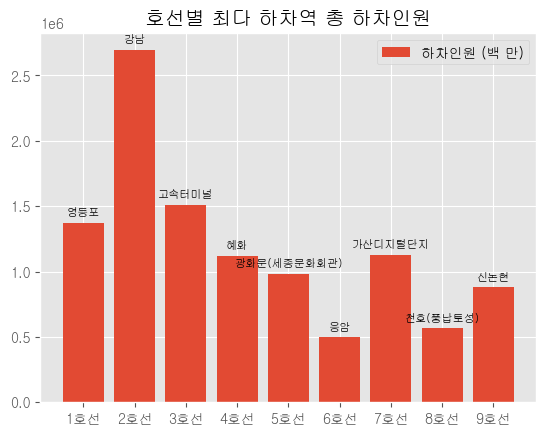

In [20]:
# 그래프
plt.bar(df_off_max['호선명'], df_off_max['총 하차인원'], label="하차인원 (백 만)")
for i in range(9):
    plt.text(i, df_off_max.iloc[i]['총 하차인원']+80000, df_off_max.iloc[i]['지하철역'], va='center', ha='center', size=8)

plt.legend()
plt.title('호선별 최다 하차역 총 하차인원')

- 호선별 최대 승/하차 역들의 가장 혼잡한 시간대는?

In [21]:
df_in_cheonho = df_in_8.iloc[[2]].T[:-1]
df_in_cheonho.columns = ['승차인원']

df_off_amsa = df_off_8.iloc[[4]].T[:-1]
df_off_amsa.columns = ['하차인원']

In [22]:
# 그래프를 그리기 위한 전치, column이름 변경
# 승차
df_in_1 = df_in_1.iloc[[0]].T[:-1]; df_in_1.columns = ['승차인원']

df_in_2 = df_in_2.iloc[[0]].T[:-1]; df_in_2.columns = ['승차인원']

df_in_3 = df_in_3.iloc[[0]].T[:-1]; df_in_3.columns = ['승차인원']

df_in_4 = df_in_4.iloc[[0]].T[:-1]; df_in_4.columns = ['승차인원']

df_in_5 = df_in_5.iloc[[0]].T[:-1]; df_in_5.columns = ['승차인원']

df_in_6 = df_in_6.iloc[[0]].T[:-1]; df_in_6.columns = ['승차인원']

df_in_7 = df_in_7.iloc[[0]].T[:-1]; df_in_7.columns = ['승차인원']

df_in_8 = df_in_8.iloc[[0]].T[:-1]; df_in_8.columns = ['승차인원']

df_in_9 = df_in_9.iloc[[0]].T[:-1]; df_in_9.columns = ['승차인원']

# 하차
df_off_1 = df_off_1.iloc[[0]].T[:-1]; df_off_1.columns = ['하차인원']

df_off_2 = df_off_2.iloc[[0]].T[:-1]; df_off_2.columns = ['하차인원']

df_off_3 = df_off_3.iloc[[0]].T[:-1]; df_off_3.columns = ['하차인원']

df_off_4 = df_off_4.iloc[[0]].T[:-1]; df_off_4.columns = ['하차인원']

df_off_5 = df_off_5.iloc[[0]].T[:-1]; df_off_5.columns = ['하차인원']

df_off_6 = df_off_6.iloc[[0]].T[:-1]; df_off_6.columns = ['하차인원']

df_off_7 = df_off_7.iloc[[0]].T[:-1]; df_off_7.columns = ['하차인원']

df_off_8 = df_off_8.iloc[[0]].T[:-1]; df_off_8.columns = ['하차인원']

df_off_9 = df_off_9.iloc[[0]].T[:-1]; df_off_9.columns = ['하차인원']

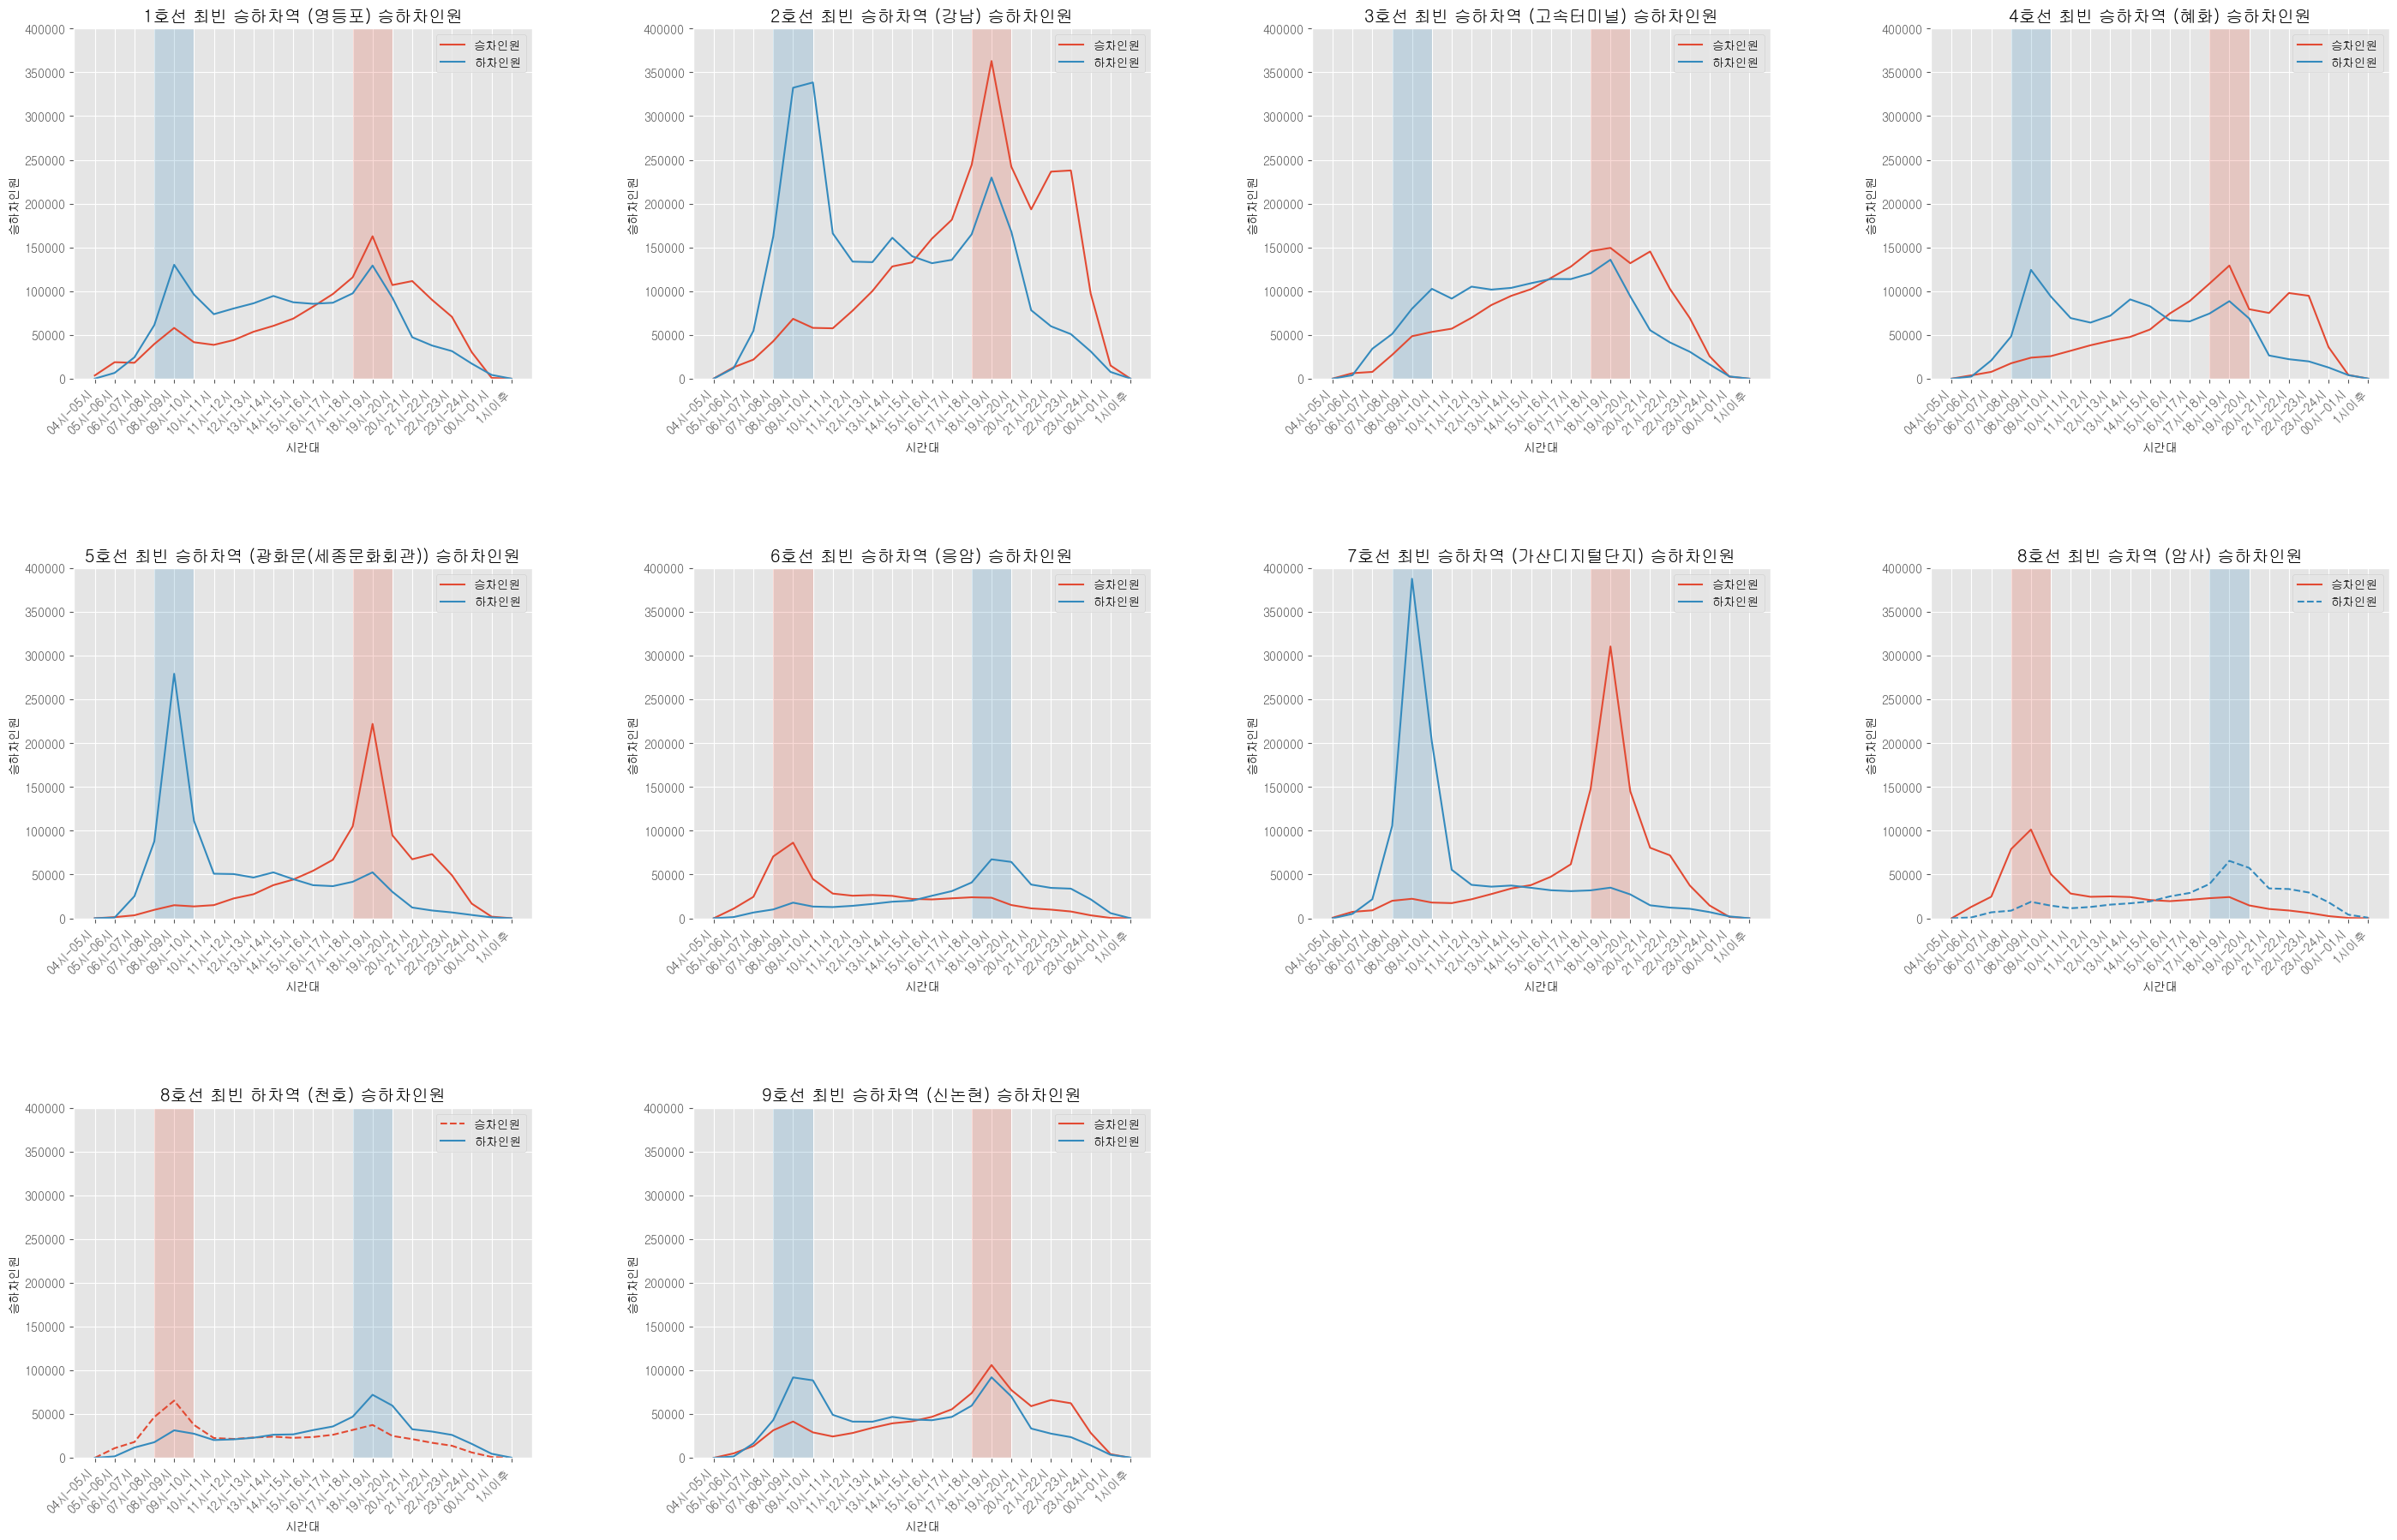

In [23]:
# 승하차 수 비교 시각화
fig = plt.figure(figsize=(30,20))

# 9개의 서브 플롯
ax1 = fig.add_subplot(3,4,1)
ax1.plot(df_in_1.index, df_in_1['승차인원'], label="승차인원")
ax1.plot(df_off_1.index, df_off_1['하차인원'], label="하차인원")
ax1.set_xlabel('시간대')
ax1.set_ylabel('승하차인원')
ax1.set_xticks(range(len(df_in_1.index)))
ax1.set_xticklabels(df_in_1.index, rotation=45, ha='right')
ax1.set_title('1호선 최빈 승하차역 (영등포) 승하차인원')
ax1.set_ylim(0, 400000)
ax1.axvspan(3, 5, facecolor='#348abd', alpha=0.2)
ax1.axvspan(13, 15, facecolor='#e24a33', alpha=0.2)
ax1.grid(True)
plt.legend()

ax2 = fig.add_subplot(3,4,2)
ax2.plot(df_in_2.index, df_in_2['승차인원'], label="승차인원")
ax2.plot(df_off_2.index, df_off_2['하차인원'], label="하차인원")
ax2.set_xlabel('시간대')
ax2.set_ylabel('승하차인원')
ax2.set_xticks(range(len(df_in_2.index)))
ax2.set_xticklabels(df_in_2.index, rotation=45, ha='right')
ax2.set_title('2호선 최빈 승하차역 (강남) 승하차인원')
ax2.set_ylim(0, 400000)
ax2.axvspan(3, 5, facecolor='#348abd', alpha=0.2)
ax2.axvspan(13, 15, facecolor='#e24a33', alpha=0.2)
ax2.grid(True)
plt.legend()


ax3 = fig.add_subplot(3,4,3)
ax3.plot(df_in_3.index, df_in_3['승차인원'], label="승차인원")
ax3.plot(df_off_3.index, df_off_3['하차인원'], label="하차인원")
ax3.set_xlabel('시간대')
ax3.set_ylabel('승하차인원')
ax3.set_xticks(range(len(df_in_3.index)))
ax3.set_xticklabels(df_in_3.index, rotation=45, ha='right')
ax3.set_title('3호선 최빈 승하차역 (고속터미널) 승하차인원')
ax3.set_ylim(0, 400000)
ax3.axvspan(3, 5, facecolor='#348abd', alpha=0.2)
ax3.axvspan(13, 15,  facecolor='#e24a33', alpha=0.2)
ax3.grid(True)
plt.legend()


ax4 = fig.add_subplot(3,4,4)
ax4.plot(df_in_4.index, df_in_4['승차인원'], label="승차인원")
ax4.plot(df_off_4.index, df_off_4['하차인원'], label="하차인원")
ax4.set_xlabel('시간대')
ax4.set_ylabel('승하차인원')
ax4.set_xticks(range(len(df_in_4.index)))
ax4.set_xticklabels(df_in_4.index, rotation=45, ha='right')
ax4.set_title('4호선 최빈 승하차역 (혜화) 승하차인원')
ax4.set_ylim(0, 400000)
ax4.axvspan(3, 5, facecolor='#348abd', alpha=0.2)
ax4.axvspan(13, 15,  facecolor='#e24a33', alpha=0.2)
ax4.grid(True)
plt.legend()


ax5 = fig.add_subplot(3,4,5)
ax5.plot(df_in_5.index, df_in_5['승차인원'], label="승차인원")
ax5.plot(df_off_5.index, df_off_5['하차인원'], label="하차인원")
ax5.set_xlabel('시간대')
ax5.set_ylabel('승하차인원')
ax5.set_xticks(range(len(df_in_5.index)))
ax5.set_xticklabels(df_in_5.index, rotation=45, ha='right')
ax5.set_title('5호선 최빈 승하차역 (광화문(세종문화회관)) 승하차인원')
ax5.set_ylim(0, 400000)
ax5.axvspan(3, 5, facecolor='#348abd', alpha=0.2)
ax5.axvspan(13, 15,  facecolor='#e24a33', alpha=0.2)
ax5.grid(True)
plt.legend()


ax6 = fig.add_subplot(3,4,6)
ax6.plot(df_in_6.index, df_in_6['승차인원'], label="승차인원")
ax6.plot(df_off_6.index, df_off_6['하차인원'], label="하차인원")
ax6.set_xlabel('시간대')
ax6.set_ylabel('승하차인원')
ax6.set_xticks(range(len(df_in_6.index)))
ax6.set_xticklabels(df_in_6.index, rotation=45, ha='right')
ax6.set_title('6호선 최빈 승하차역 (응암) 승하차인원')
ax6.set_ylim(0, 400000)
ax6.axvspan(3, 5,  facecolor='#e24a33', alpha=0.2)
ax6.axvspan(13, 15, facecolor='#348abd', alpha=0.2)
ax6.grid(True)
plt.legend()

ax7 = fig.add_subplot(3,4,7)
ax7.plot(df_in_7.index, df_in_7['승차인원'], label="승차인원")
ax7.plot(df_off_7.index, df_off_7['하차인원'], label="하차인원")
ax7.set_xlabel('시간대')
ax7.set_ylabel('승하차인원')
ax7.set_xticks(range(len(df_in_7.index)))
ax7.set_xticklabels(df_in_7.index, rotation=45, ha='right')
ax7.set_title('7호선 최빈 승하차역 (가산디지털단지) 승하차인원')
ax7.set_ylim(0, 400000)
ax7.axvspan(3, 5, facecolor='#348abd', alpha=0.2)
ax7.axvspan(13, 15,  facecolor='#e24a33', alpha=0.2)
ax7.grid(True)
plt.legend()

ax8_1 = fig.add_subplot(3,4,8)
ax8_1.plot(df_in_8.index, df_in_8['승차인원'], label="승차인원")
ax8_1.plot(df_off_amsa.index, df_off_amsa['하차인원'], label="하차인원", linestyle='dashed')
ax8_1.set_xlabel('시간대')
ax8_1.set_ylabel('승하차인원')
ax8_1.set_xticks(range(len(df_in_8.index)))
ax8_1.set_xticklabels(df_in_8.index, rotation=45, ha='right')
ax8_1.set_title('8호선 최빈 승차역 (암사) 승하차인원')
ax8_1.set_ylim(0, 400000)
ax8_1.axvspan(3, 5, facecolor='#e24a33', alpha=0.2)
ax8_1.axvspan(13, 15, facecolor='#348abd', alpha=0.2)
ax8_1.grid(True)
plt.legend()

ax8_2 = fig.add_subplot(3,4,9)
ax8_2.plot(df_in_cheonho.index, df_in_cheonho['승차인원'], label="승차인원", linestyle='dashed')
ax8_2.plot(df_off_8.index, df_off_8['하차인원'], label="하차인원")
ax8_2.set_xlabel('시간대')
ax8_2.set_ylabel('승하차인원')
ax8_2.set_xticks(range(len(df_in_8.index)))
ax8_2.set_xticklabels(df_in_8.index, rotation=45, ha='right')
ax8_2.set_title('8호선 최빈 하차역 (천호) 승하차인원')
ax8_2.set_ylim(0, 400000)
ax8_2.axvspan(3, 5, facecolor='#e24a33', alpha=0.2)
ax8_2.axvspan(13, 15, facecolor='#348abd', alpha=0.2)
ax8_2.grid(True)
plt.legend()


ax9 = fig.add_subplot(3,4,10)
ax9.plot(df_in_9.index, df_in_9['승차인원'], label="승차인원")
ax9.plot(df_off_9.index, df_off_9['하차인원'], label="하차인원")
ax9.set_xlabel('시간대')
ax9.set_ylabel('승하차인원')
ax9.set_xticks(range(len(df_in_9.index)))
ax9.set_xticklabels(df_in_9.index, rotation=45, ha='right')
ax9.set_title('9호선 최빈 승하차역 (신논현) 승하차인원')
ax9.set_ylim(0, 400000)
ax9.axvspan(3, 5, facecolor='#348abd', alpha=0.2)
ax9.axvspan(13, 15,  facecolor='#e24a33', alpha=0.2)
ax9.grid(True)
plt.legend()

plt.tight_layout(pad=8)
plt.show()

### 해석
- 예상한대로 출퇴근시간대에 이용객이 몰리는 경향을 보인다. 회사들이 몰려있는 지역에 출근시간대에 하차승객이 많고, 퇴근시간대에 승차객이 많다.
- 또한 대부분의 역들이 승차그래프와 하차그래프가 대칭을 이룬다.
- 그러나 영등포, 강남, 신논현 같은 경우는 퇴근시간대에도 이용객이 많다. 이는 출근시에는 다른 교통수단을 이용하고 퇴근시에는 지하철을 이용했을것으로 추측된다.
- 고속터미널역과 혜화역 같은 경우 하차승객이 꾸준히 많은데 그 이유는 고속터미널역은 고속버스이용객으로 인한 현상으로, 혜화역은 여행지로서의 성격이 강하기 때문이라고 추측된다.

## 2. 환승가능여부에 따른 이용객 수 비교

### 1. 환승가능여부에 따른 승차 이용객 수 비교

In [77]:
# 2017~2021년도 평균 승차 이용객수
df_in_passengers.head()

04시-05시       05시-06시       06시-07시       07시-08시   08시-09시  \
호선명 지하철역                                                                       
1호선 가능        378.566667   7903.966667  12657.900000  24975.150000  23638.50   
    가산디지털단지  1340.000000   8205.400000   7914.766667  14763.350000  14539.55   
    간석        375.650000   5440.366667  11762.750000  26198.050000  22571.60   
    개봉       1226.050000  18414.966667  36569.333333  95251.200000  90883.65   
    관악        187.150000   6983.550000  13008.033333  34716.916667  33257.35   

                  09시-10시       10시-11시       11시-12시       12시-13시  \
호선명 지하철역                                                              
1호선 가능       15203.016667  12468.350000  11413.266667  11396.200000   
    가산디지털단지  11594.316667  10380.716667  10997.616667  12513.066667   
    간석       12716.833333   9789.983333   9361.316667   9559.716667   
    개봉       54553.400000  38545.633333  34222.066667  35046.450000   
    관악       17020.783333  11564.533333  10261.366667  12046.166667   

                  13시-14시  ...       17시-18시        18시-19시       19시-20시  \
호선명 지하철역                   ...                                              
1호선 가능       10297.183333  ...  11904.933333   10438.883333   6907.316667   
    가산디지털단지  14100.000000  ...  50636.116667  110261.866667  49507.783333   
    간석        9258.916667  ...   9440.016667    9900.700000   6011.500000   
    개봉       33677.733333  ...  32939.283333   33536.800000  21150.850000   
    관악       11519.200000  ...  13637.950000   12179.150000   7554.000000   

                  20시-21시       21시-22시       22시-23시      23시-24시  \
호선명 지하철역                                                             
1호선 가능        5042.433333   4362.666667   3276.916667  1441.250000   
    가산디지털단지  29847.500000  25568.883333  17028.533333  6963.900000   
    간석        4716.033333   4322.416667   3165.583333  1666.233333   
    개봉       16104.250000  14619.383333  10667.933333  4663.666667   
    관악        5467.800000   5186.383333   3273.933333  1254.416667   

                00시-01시      1시이후         총 승차인원  
호선명 지하철역                                          
1호선 가능       112.983333  0.050000  201486.200000  
    가산디지털단지  182.500000  0.700000  448042.516667  
    간석       146.683333  0.116667  181198.750000  
    개봉       175.616667  0.300000  659822.750000  
    관악        52.500000  0.066667  232469.550000  

[5 rows x 23 columns]

In [78]:
df_in_passengers.reset_index(inplace=True)

In [79]:
# 환승가능여부 컬럼 추가
df_in_passengers['환승가능여부'] = ''
stations = df_in_passengers['지하철역'].unique()

for i in stations:
    index = df_in_passengers[df_in_passengers['지하철역'] == i].index
    if len(df_in_passengers[df_in_passengers['지하철역'] == i]) > 1:
        for j in index:
            df_in_passengers.iloc[j,-1] = 'Y'
    else:
        df_in_passengers.iloc[index[0],-1] = 'N'

In [80]:
df_in_passengers.head(3)

,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,1시이후,총 승차인원,환승가능여부
0,1호선,가능,378.566667,7903.966667,12657.900000,24975.15,23638.50,15203.016667,12468.350000,11413.266667,...,10438.883333,6907.316667,5042.433333,4362.666667,3276.916667,1441.250000,112.983333,0.050000,201486.200000,N
1,1호선,가산디지털단지,1340.000000,8205.400000,7914.766667,14763.35,14539.55,11594.316667,10380.716667,10997.616667,...,110261.866667,49507.783333,29847.500000,25568.883333,17028.533333,6963.900000,182.500000,0.700000,448042.516667,Y
2,1호선,간석,375.650000,5440.366667,11762.750000,26198.05,22571.60,12716.833333,9789.983333,9361.316667,...,9900.700000,6011.500000,4716.033333,4322.416667,3165.583333,1666.233333,146.683333,0.116667,181198.750000,N


In [81]:
df_trans_in = df_in_passengers.groupby(['지하철역', '환승가능여부'], group_keys=False).sum()

In [82]:
df_trans_in.reset_index(inplace=True)

In [83]:
# 총 승차인원수 순으로 정렬
df_trans_in[['지하철역', '총 승차인원', '환승가능여부']].sort_values('총 승차인원', ascending=False).head(10)

,지하철역,총 승차인원,환승가능여부
423,잠실(송파구청),2.710759e+06,Y
11,강남,2.671963e+06,N
35,고속터미널,2.496052e+06,Y
509,홍대입구,2.343673e+06,Y
307,신림,1.931418e+06,N
218,사당,1.924646e+06,Y
260,선릉,1.788002e+06,Y
53,구로디지털단지,1.730418e+06,N
305,신도림,1.703174e+06,Y
25,건대입구,1.599070e+06,Y


In [84]:
# 호선이 하나뿐인 역들의 승차인원의 평균
df_trans_in[df_trans_in['환승가능여부'] == 'N']['총 승차인원'].mean()

309211.2859710509

In [85]:
# 호선이 여러개인 역들의 승차인원의 평균
df_trans_in[df_trans_in['환승가능여부'] == 'Y']['총 승차인원'].mean()

845958.19111832

Text(0, 0.5, '총 승차인원(백만 명)')

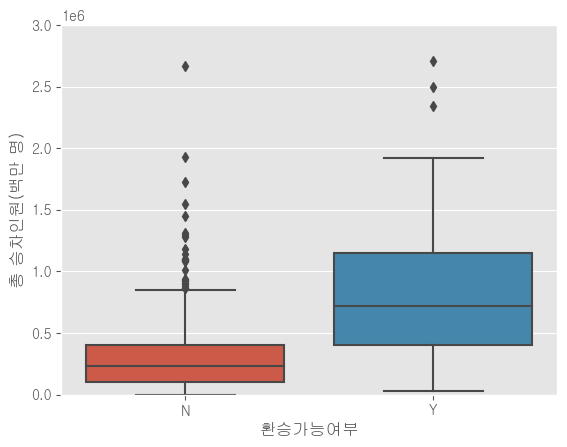

In [86]:
# 시각화
sns.boxplot(x=df_trans_in['환승가능여부'], y=df_trans_in['총 승차인원'])
plt.ylim(0, 3000000)
plt.ylabel('총 승차인원(백만 명)')

### 2. 환승가능여부에 따른 하차 이용객 수 비교

In [89]:
# 2017~2021년도 평균 하차 이용객수
df_off_passengers.head()

04시-05시      05시-06시       06시-07시       07시-08시  \
호선명 지하철역                                                          
1호선 가능        6.050000  1626.133333   4374.083333   5366.183333   
    가산디지털단지   6.133333  1980.583333  10941.750000  46802.533333   
    간석       10.866667  1158.600000   2589.983333   4138.650000   
    개봉        8.633333  5494.800000  11855.966667  16530.883333   
    관악        1.800000  1931.716667   4626.450000   6062.566667   

                   08시-09시       09시-10시       10시-11시       11시-12시  \
호선명 지하철역                                                               
1호선 가능        16129.050000   8418.733333   6858.433333   6510.516667   
    가산디지털단지  153276.750000  72598.500000  21970.766667  16996.766667   
    간석         8974.150000   5961.950000   5196.216667   5690.166667   
    개봉        26158.450000  20669.783333  17667.533333  20241.466667   
    관악        10607.266667  11114.666667  10735.233333   8128.400000   

                  12시-13시       13시-14시  ...       17시-18시       18시-19시  \
호선명 지하철역                                 ...                               
1호선 가능        7152.233333   8397.616667  ...  14506.450000  19975.616667   
    가산디지털단지  16409.233333  17653.733333  ...  23332.466667  27912.033333   
    간석        6616.683333   7212.183333  ...  14301.233333  19304.766667   
    개봉       24447.716667  24229.850000  ...  59967.050000  89897.233333   
    관악        8069.283333   7915.516667  ...  15376.666667  27496.433333   

                  19시-20시       20시-21시       21시-22시       22시-23시  \
호선명 지하철역                                                              
1호선 가능       19968.933333  13216.083333   9974.333333   9940.933333   
    가산디지털단지  22441.483333  13175.716667  13044.050000  11600.800000   
    간석       19758.183333  12610.466667  10974.983333  10211.350000   
    개봉       78656.183333  48984.700000  44434.883333  39313.183333   
    관악       24178.633333  14773.550000  14446.850000  12601.583333   

                  23시-24시      00시-01시      1시이후         총 하차인원  
호선명 지하철역                                                         
1호선 가능        6906.650000  1916.666667  1.650000  190483.066667  
    가산디지털단지   6686.566667  1090.016667  2.033333  530362.966667  
    간석        7005.550000  2437.116667  2.066667  171472.816667  
    개봉       24220.900000  3167.933333  2.283333  662729.900000  
    관악        8734.116667   980.500000  0.266667  217357.950000  

[5 rows x 23 columns]

In [90]:
df_off_passengers.reset_index(inplace=True)

In [91]:
# 환승가능여부 컬럼 추가
df_off_passengers['환승가능여부'] = ''

for i in stations:
    index = df_off_passengers[df_off_passengers['지하철역'] == i].index
    if len(df_off_passengers[df_off_passengers['지하철역'] == i]) > 1:
        for j in index:
            df_off_passengers.iloc[j,-1] = 'Y'
    else:
        df_off_passengers.iloc[index[0],-1] = 'N'

In [92]:
df_off_passengers.head(3)

,호선명,지하철역,04시-05시,05시-06시,06시-07시,07시-08시,08시-09시,09시-10시,10시-11시,11시-12시,...,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,00시-01시,1시이후,총 하차인원,환승가능여부
0,1호선,가능,6.050000,1626.133333,4374.083333,5366.183333,16129.05,8418.733333,6858.433333,6510.516667,...,19975.616667,19968.933333,13216.083333,9974.333333,9940.933333,6906.650000,1916.666667,1.650000,190483.066667,N
1,1호선,가산디지털단지,6.133333,1980.583333,10941.750000,46802.533333,153276.75,72598.500000,21970.766667,16996.766667,...,27912.033333,22441.483333,13175.716667,13044.050000,11600.800000,6686.566667,1090.016667,2.033333,530362.966667,Y
2,1호선,간석,10.866667,1158.600000,2589.983333,4138.650000,8974.15,5961.950000,5196.216667,5690.166667,...,19304.766667,19758.183333,12610.466667,10974.983333,10211.350000,7005.550000,2437.116667,2.066667,171472.816667,N


In [93]:
df_trans_off = df_off_passengers.groupby(['지하철역', '환승가능여부'], group_keys=False).sum()

In [94]:
df_trans_off.reset_index(inplace=True)

In [95]:
# 총 승차인원수 순으로 정렬
df_trans_off[['지하철역', '총 하차인원', '환승가능여부']].sort_values('총 하차인원', ascending=False).head(10)

,지하철역,총 하차인원,환승가능여부
11,강남,2.692097e+06,N
423,잠실(송파구청),2.678816e+06,Y
35,고속터미널,2.527370e+06,Y
509,홍대입구,2.486185e+06,Y
218,사당,1.970104e+06,Y
307,신림,1.881374e+06,N
260,선릉,1.816796e+06,Y
25,건대입구,1.731168e+06,Y
53,구로디지털단지,1.729752e+06,N
305,신도림,1.692234e+06,Y


In [96]:
# 호선이 하나뿐인 역들의 승차인원의 평균
df_trans_off[df_trans_off['환승가능여부'] == 'N']['총 하차인원'].mean()

305607.70943810884

In [97]:
# 호선이 여러개인 역들의 승차인원의 평균
df_trans_off[df_trans_off['환승가능여부'] == 'Y']['총 하차인원'].mean()

857599.8162561844

Text(0, 0.5, '총 하차인원(백만 명)')

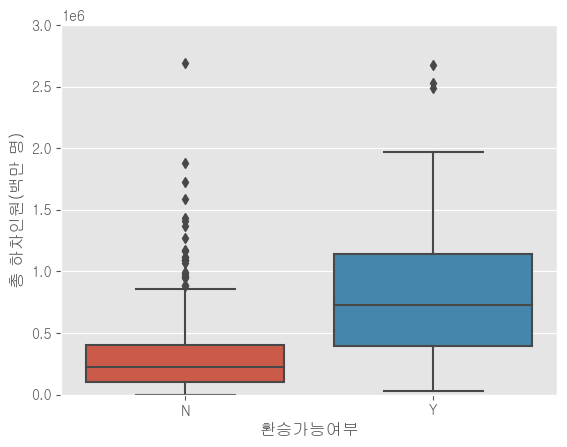

In [98]:
# 시각화
sns.boxplot(x=df_trans_off['환승가능여부'], y=df_trans_off['총 하차인원'])
plt.ylim(0, 3000000)
plt.ylabel('총 하차인원(백만 명)')

#### 해석
- 환승역일수록 이용객이 많은 경향을 보인다. 

## 3. 서울시 내의 지하철 역 분석

### 1. 유무임 데이터 결합

In [99]:
# 역별 연평균 이용객
df_trans = df.groupby(['호선명', '지하철역'], group_keys=False).mean()

In [100]:
# 총 이용객 column추가
df_trans['총 이용객'] = df_trans.sum(axis=1)

In [101]:
# 유무임승하차인원 데이터 로드
df_fares = pd.read_csv('./유무임승하차인원1~9.csv')
df_fares = df_fares.groupby(['호선명', '지하철역'], group_keys=False).mean()
df_fares.drop(columns='사용월', inplace=True)

In [102]:
# 역별 연평균 이용객데이터와 유무임승하차인원 데이터 결합
df_trans = pd.concat([df_trans, df_fares],axis=1)

In [103]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 609 entries, ('1호선', '가능') to ('중앙선', '한남')
Data columns (total 49 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   04시-05시 승차인원  609 non-null    float64
 1   04시-05시 하차인원  609 non-null    float64
 2   05시-06시 승차인원  609 non-null    float64
 3   05시-06시 하차인원  609 non-null    float64
 4   06시-07시 승차인원  609 non-null    float64
 5   06시-07시 하차인원  609 non-null    float64
 6   07시-08시 승차인원  609 non-null    float64
 7   07시-08시 하차인원  609 non-null    float64
 8   08시-09시 승차인원  609 non-null    float64
 9   08시-09시 하차인원  609 non-null    float64
 10  09시-10시 승차인원  609 non-null    float64
 11  09시-10시 하차인원  609 non-null    float64
 12  10시-11시 승차인원  609 non-null    float64
 13  10시-11시 하차인원  609 non-null    float64
 14  11시-12시 승차인원  609 non-null    float64
 15  11시-12시 하차인원  609 non-null    float64
 16  12시-13시 승차인원  609 non-null    float64
 17  12시-13시 하차인원  609 non-null    float64
 18  13시-14시 

In [104]:
df_trans.reset_index(inplace=True)

In [105]:
# 데이터프레임 저장
df_trans.to_csv('연평균 지하철 이용객.csv', index=False)

### 2. 서울시 내의 지하철 환승유무

In [106]:
# 서울시에 있는 역들만 추려진 데이터 로드
df_trans_seoul = pd.read_csv('./seoul_stations.csv')
df_trans_seoul.drop(columns=['주소', '위도', '경도'], inplace=True)

In [107]:
df_trans_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 51 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   지하철역          377 non-null    object 
 1   호선명           377 non-null    object 
 2   04시-05시 승차인원  377 non-null    float64
 3   04시-05시 하차인원  377 non-null    float64
 4   05시-06시 승차인원  377 non-null    float64
 5   05시-06시 하차인원  377 non-null    float64
 6   06시-07시 승차인원  377 non-null    float64
 7   06시-07시 하차인원  377 non-null    float64
 8   07시-08시 승차인원  377 non-null    float64
 9   07시-08시 하차인원  377 non-null    float64
 10  08시-09시 승차인원  377 non-null    float64
 11  08시-09시 하차인원  377 non-null    float64
 12  09시-10시 승차인원  377 non-null    float64
 13  09시-10시 하차인원  377 non-null    float64
 14  10시-11시 승차인원  377 non-null    float64
 15  10시-11시 하차인원  377 non-null    float64
 16  11시-12시 승차인원  377 non-null    float64
 17  11시-12시 하차인원  377 non-null    float64
 18  12시-13시 승차인원  377 non-null    

In [108]:
# 환승가능여부 컬럼 추가
df_trans_seoul['환승가능여부'] = ''
stations = df_trans_seoul['지하철역'].unique()

for i in stations:
    index = df_trans_seoul[df_trans_seoul['지하철역'] == i].index
    if len(df_trans_seoul[df_trans_seoul['지하철역'] == i]) > 1:
        for j in index:
            df_trans_seoul.iloc[j,-1] = 'Y'
    else:
        df_trans_seoul.iloc[index[0],-1] = 'N'

In [109]:
# 호선별 환승역의 수 확인
df_lines_trans=df_trans_seoul.groupby(['호선명','환승가능여부'])[['지하철역']].count()[:18]
df_lines_trans

지하철역
호선명 환승가능여부      
1호선 N         21
    Y         15
2호선 N         29
    Y         21
3호선 N         20
    Y         13
4호선 N         14
    Y         12
5호선 N         36
    Y         16
6호선 N         24
    Y         15
7호선 N         27
    Y         12
8호선 N          6
    Y          5
9호선 N         27
    Y         11

In [110]:
df_lines_trans.reset_index(inplace=True)

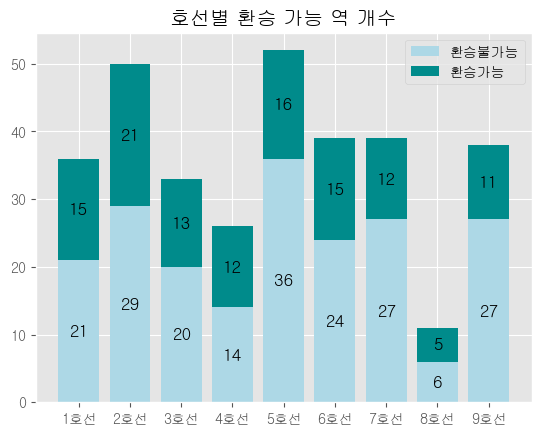

In [111]:
# 호선별 환승역/비환승역 개수 시각화
df_lines_trans_y=df_lines_trans[df_lines_trans['환승가능여부']=='Y']
df_lines_trans_n=df_lines_trans[df_lines_trans['환승가능여부']=='N']
bar1=plt.bar(df_lines_trans_y['호선명'],df_lines_trans_n['지하철역'], color='lightblue')
bar2=plt.bar(df_lines_trans_n['호선명'],df_lines_trans_y['지하철역'],bottom=df_lines_trans_n['지하철역'], color='darkcyan')
plt.bar_label(bar1,size=12,label_type='center')
plt.bar_label(bar2,size=12,label_type='center')
plt.title('호선별 환승 가능 역 개수')
plt.legend(handles=(bar1,bar2), labels=('환승불가능','환승가능'), loc='upper right')

### 3. 서울시 내의 이용객 수 분석

In [112]:
# 이용객이 적은 역에 대한 분석용 데이터
df_trans_lower = df_trans_seoul.groupby(['지하철역', '환승가능여부'], group_keys=False).sum()
df_trans_lower.head(3)

,,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,1시이후 승차,1시이후 하차,총 이용객,유임승차인원,무임승차인원,유임하차인원,무임하차인원
지하철역,환승가능여부,,,,,,,,,,,,,,,,,,,,,
4.19민주묘지,N,6.596154,1.750000,1247.038462,256.711538,2867.442308,1003.576923,7135.115385,1607.961538,8178.480769,6655.538462,...,2349.923077,78.384615,482.750000,0.230769,5.250000,1.652416e+05,5.495531e+04,29204.692308,5.435063e+04,26730.942308
가락시장,Y,34.366667,1.066667,5271.683333,2893.800000,12025.533333,11336.716667,30956.550000,23363.300000,37710.700000,67904.966667,...,11662.750000,920.733333,4245.266667,4.866667,403.833333,9.979116e+05,3.636982e+05,123148.283333,3.885839e+05,122481.250000
가산디지털단지,Y,2003.850000,9.483333,15564.016667,7025.583333,16975.383333,32687.516667,34750.616667,152381.283333,36821.466667,541141.316667,...,13743.116667,1685.450000,3208.516667,3.533333,11.733333,3.240999e+06,1.477173e+06,105393.466667,1.554200e+06,104233.400000


In [113]:
df_trans_lower['환승호선'] = df_trans_seoul.groupby(['지하철역', '환승가능여부'], group_keys=False)[['호선명']].sum().values

In [114]:
# 총 이용객에 대한 오름차순 정렬
df_trans_lower.sort_values('총 이용객', inplace=True)

In [115]:
df_trans_lower.reset_index(inplace=True)
df_trans_lower.head(3)

,지하철역,환승가능여부,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,...,00시-01시 승차인원,00시-01시 하차인원,1시이후 승차,1시이후 하차,총 이용객,유임승차인원,무임승차인원,유임하차인원,무임하차인원,환승호선
0,둔촌오륜,N,0.513514,0.054054,171.324324,154.297297,728.837838,1493.567568,2762.459459,3117.567568,...,17.891892,109.081081,0.459459,5.243243,51995.621622,22110.729730,5096.297297,19689.945946,5098.648649,9호선
1,신내,Y,13.383333,0.233333,493.916667,370.000000,1385.746667,1692.633333,3314.380000,3298.133333,...,4.280000,132.333333,0.033333,0.050000,60627.416667,20713.593333,9150.273333,21884.566667,8878.983333,6호선경춘선
2,도림천,N,2.483333,0.066667,357.533333,337.316667,1105.483333,844.483333,2931.333333,4494.350000,...,24.500000,252.516667,0.650000,5.866667,69743.083333,27226.300000,6403.083333,29167.050000,6946.650000,2호선


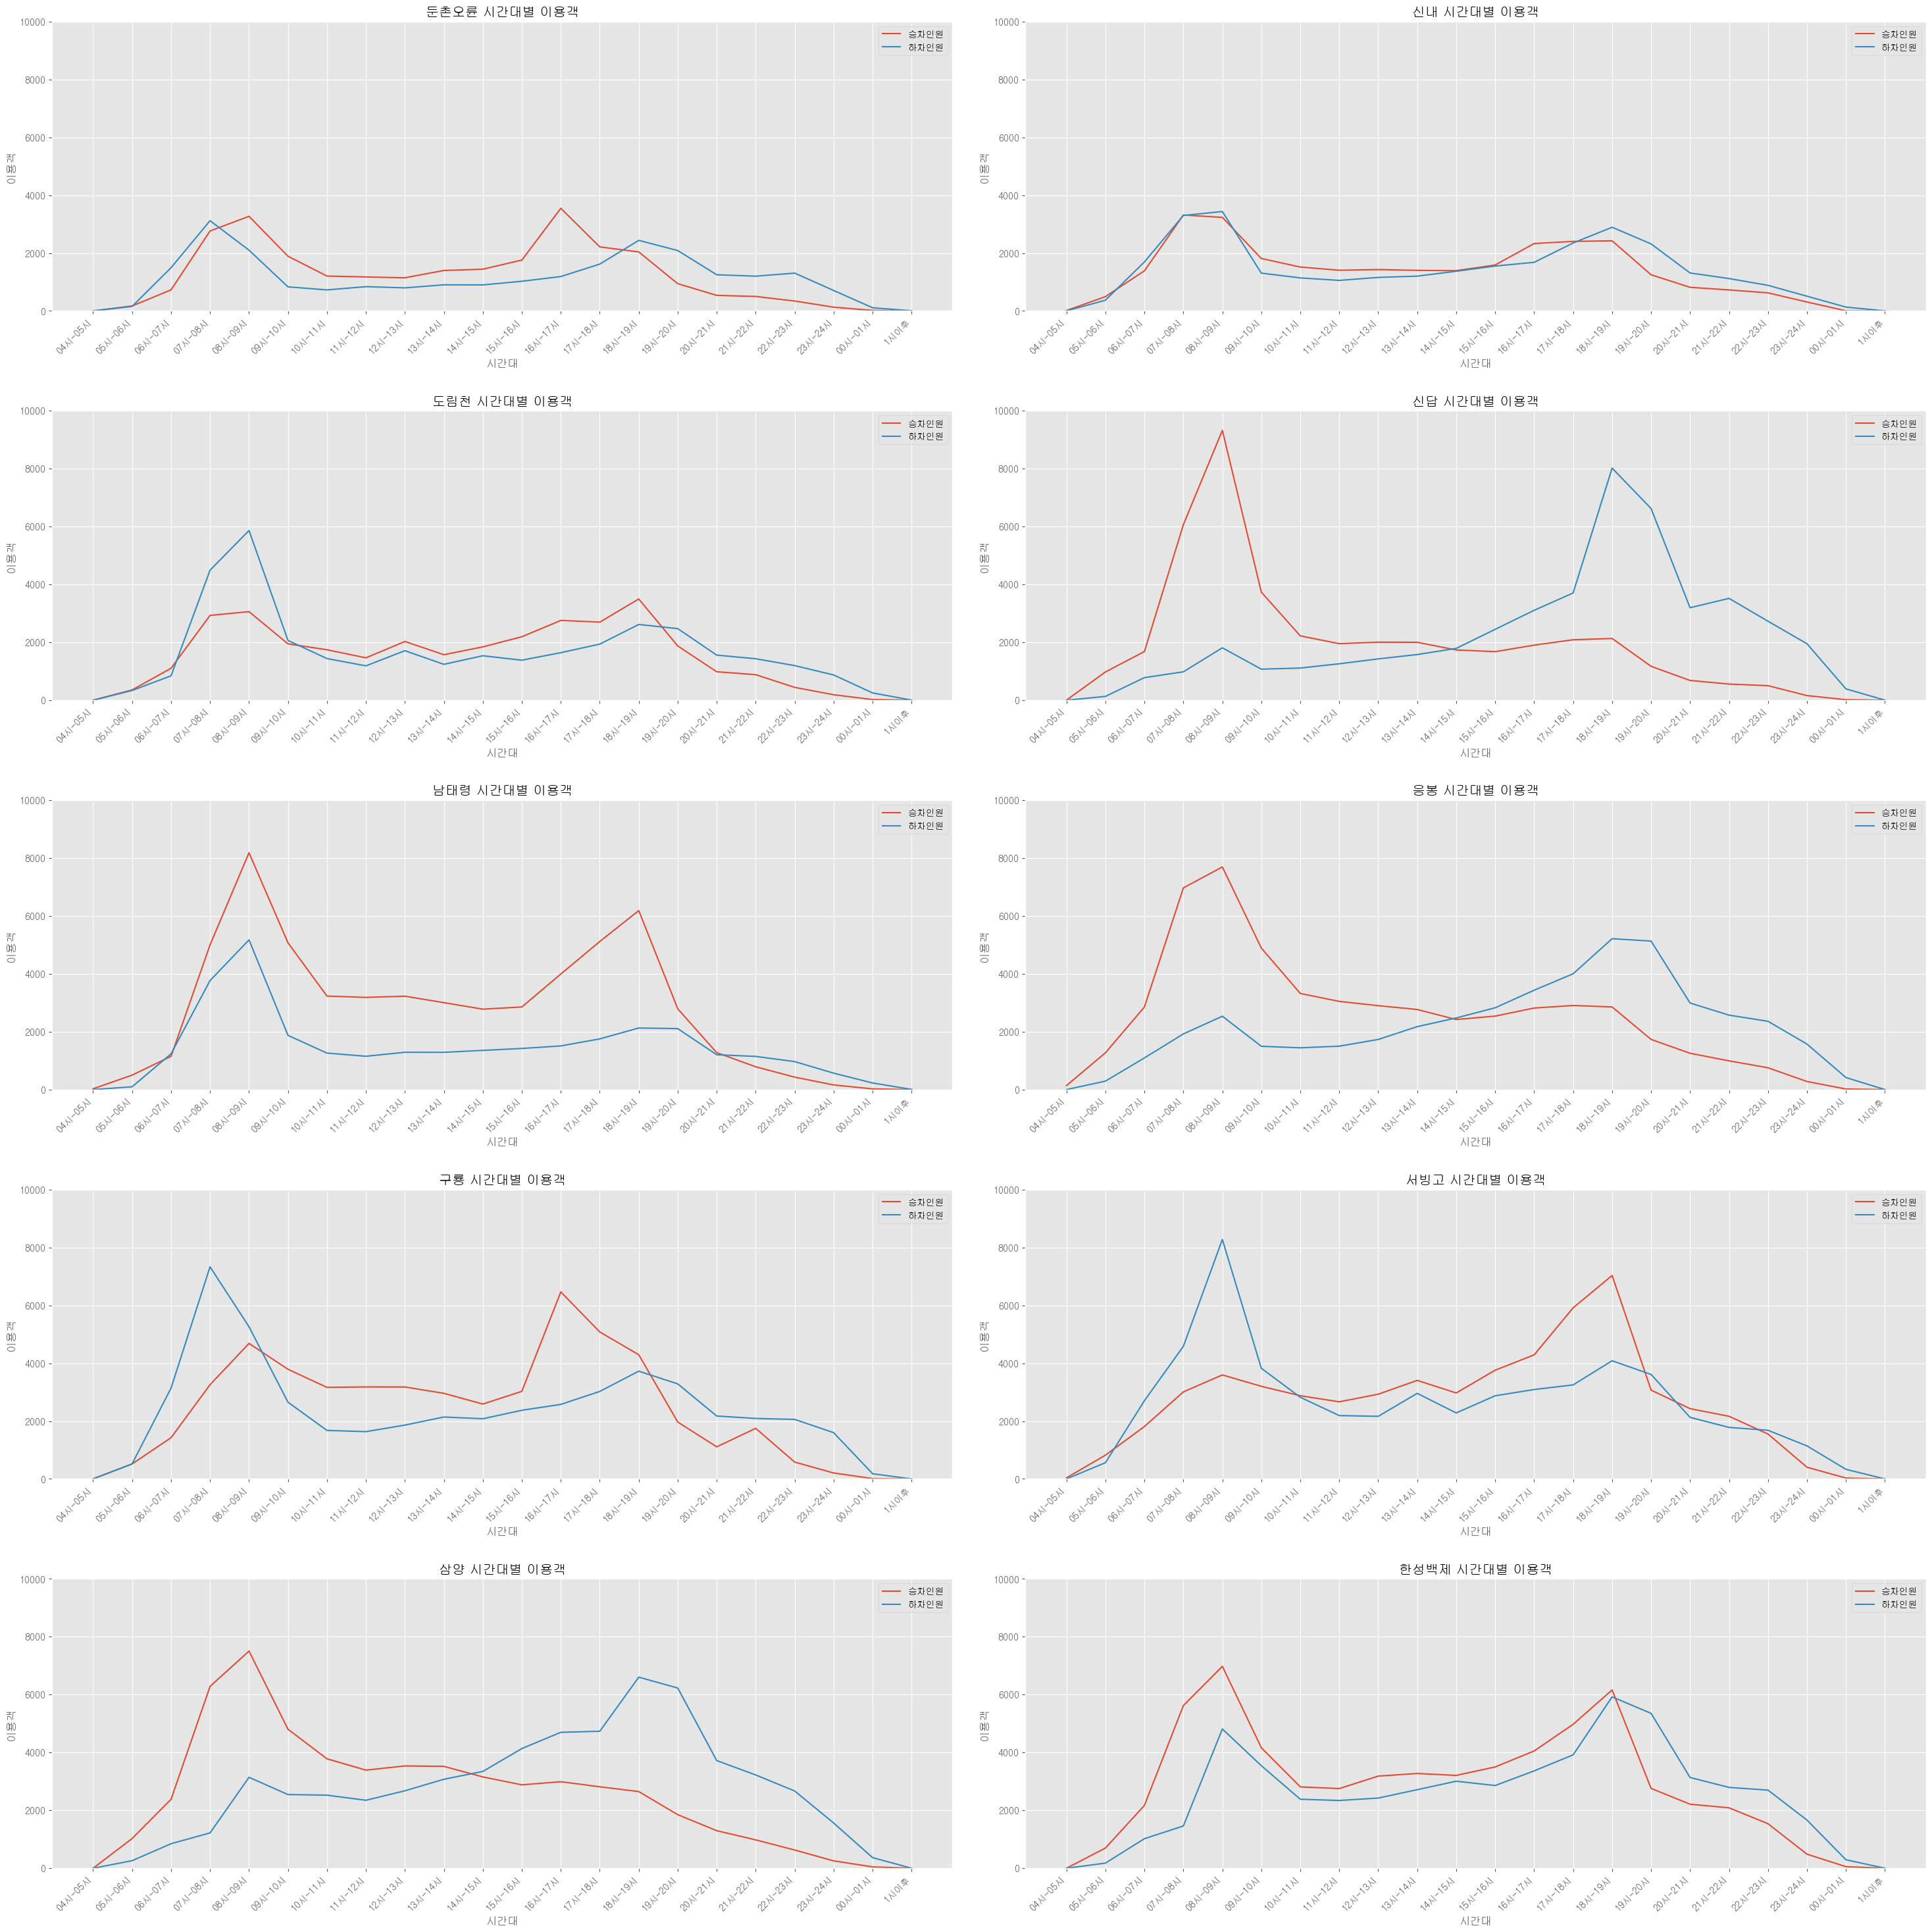

In [116]:
# 총 이용객 하위 10개 역 시간대별 이용객수
fig = plt.figure(figsize=(30,30))

for i in range(10):
    # 10개의 서브 플롯
    ax_i = fig.add_subplot(5,2,i+1)
    # 승차 그래프
    ax_i.plot(df_trans_lower.loc[i].index[2:-6:2].str.split(' ').str[0], df_trans_lower.loc[i].values[2:-6:2], label="승차인원")
    # 하차 그래프
    ax_i.plot(df_trans_lower.loc[i].index[3:-6:2].str.split(' ').str[0], df_trans_lower.loc[i].values[3:-6:2], label="하차인원")
    
    ax_i.set_xlabel('시간대')
    ax_i.set_ylabel('이용객')
    ax_i.set_xticks(range(len(df_trans_lower.loc[i].index[2:-6:2].str.split(' ').str[0])))
    ax_i.set_xticklabels(df_trans_lower.loc[i].index[2:-6:2].str.split(' ').str[0], rotation=45, ha='right')
    ax_i.set_title(f'{df_trans_lower.loc[i].values[0]} 시간대별 이용객')
    ax_i.set_ylim(0, 10000)
    ax_i.grid(True)
    plt.legend()
    
plt.tight_layout(pad = 3)
plt.show()

In [117]:
# 출/퇴근시간대 승/하차 컬럼추가
df_trans_lower['출근시간대 승차'] = df_trans_lower[['07시-08시 승차인원', '08시-09시 승차인원', '09시-10시 승차인원']].sum(axis=1)
df_trans_lower['출근시간대 하차'] = df_trans_lower[['07시-08시 하차인원', '08시-09시 하차인원', '09시-10시 하차인원']].sum(axis=1)

df_trans_lower['퇴근시간대 승차'] = df_trans_lower[['17시-18시 승차인원', '18시-19시 승차인원', '19시-20시 승차인원']].sum(axis=1)
df_trans_lower['퇴근시간대 하차'] = df_trans_lower[['17시-18시 하차인원', '18시-19시 하차인원', '19시-20시 하차인원']].sum(axis=1)

# 유임이용객, 무임이용객 수 컬럼 추가
df_trans_lower['유임이용객'] = df_trans_lower['유임승차인원'] + df_trans_lower['유임하차인원']
df_trans_lower['무임이용객'] = df_trans_lower['무임승차인원'] + df_trans_lower['무임하차인원']

In [118]:
# 필요한 컬럼만 추출
df_trans_fares = pd.concat([df_trans_lower[['지하철역', '환승가능여부']], df_trans_lower[df_trans_lower.columns[-6:]]], axis=1)

In [119]:
df_trans_fares['총 이용객'] = df_trans_fares['유임이용객'] + df_trans_fares['무임이용객']
df_trans_fares['유임이용객 비율']=round(df_trans_fares['유임이용객']/df_trans_fares['총 이용객'],3)
df_trans_fares['무임이용객 비율']=round(df_trans_fares['무임이용객']/df_trans_fares['총 이용객'],3)

In [120]:
df_trans_fares.head(10)

,지하철역,환승가능여부,출근시간대 승차,출근시간대 하차,퇴근시간대 승차,퇴근시간대 하차,유임이용객,무임이용객,총 이용객,유임이용객 비율,무임이용객 비율
0,둔촌오륜,N,7921.540541,6047.405405,5192.351351,6142.054054,41800.675676,10194.945946,51995.621622,0.804,0.196
1,신내,Y,8358.506667,8037.916667,6073.966667,7554.633333,42598.160000,18029.256667,60627.416667,0.703,0.297
2,도림천,N,7942.866667,12425.200000,8075.800000,7033.316667,56393.350000,13349.733333,69743.083333,0.809,0.191
3,신답,N,19130.333333,3869.283333,5398.500000,18350.950000,70609.900000,19692.600000,90302.500000,0.782,0.218
4,남태령,N,18255.500000,10813.383333,14093.733333,5986.816667,74526.450000,15989.983333,90516.433333,0.823,0.177
5,응봉,N,19552.750000,5956.116667,7495.766667,14347.050000,70080.683333,31542.833333,101623.516667,0.690,0.310
6,구룡,N,11727.416667,15238.400000,11336.683333,10031.950000,76661.000000,27933.833333,104594.833333,0.733,0.267
7,서빙고,N,9802.650000,16680.300000,16011.283333,10942.683333,85160.733333,29116.866667,114277.600000,0.745,0.255
8,삼양,N,18592.961538,6912.384615,7319.307692,17565.365385,65438.557692,50314.653846,115753.211538,0.565,0.435
9,한성백제,N,16765.324324,9819.027027,13895.540541,15193.675676,95712.918919,22907.054054,118619.972973,0.807,0.193


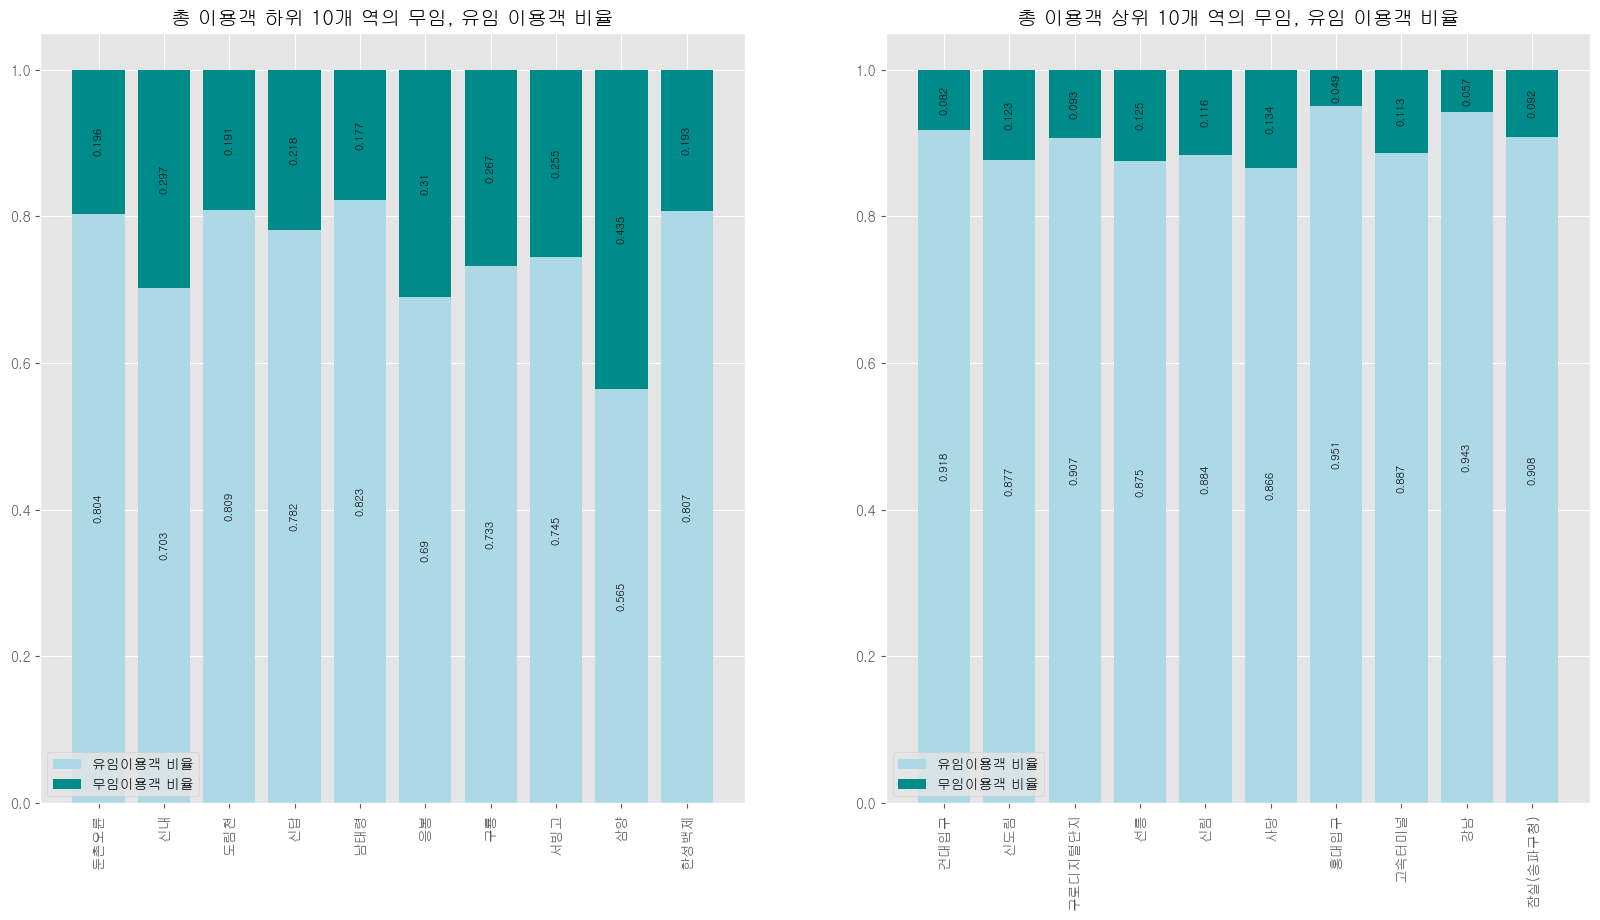

In [121]:
# 총 이용객 상위/하위 10개역의 유/무임 이용객 비율 시각화
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(1,2,1)
bar1=ax1.bar(df_trans_fares.head(10)['지하철역'],df_trans_fares.head(10)['유임이용객 비율'], color='lightblue')
bar2=ax1.bar(df_trans_fares.head(10)['지하철역'],df_trans_fares.head(10)['무임이용객 비율'],bottom=df_trans_fares.head(10)['유임이용객 비율'], color='darkcyan')
plt.title("총 이용객 하위 10개 역의 무임, 유임 이용객 비율")
plt.xticks(df_trans_fares.head(10)['지하철역'], rotation=90)
plt.bar_label(bar1,size=8,label_type='center', rotation=90)
plt.bar_label(bar2,size=8,label_type='center', rotation=90)
plt.legend(handles=(bar1,bar2), labels=('유임이용객 비율','무임이용객 비율'), loc='lower left')

ax2 = fig.add_subplot(1,2,2)
bar1=ax2.bar(df_trans_fares.tail(10)['지하철역'],df_trans_fares.tail(10)['유임이용객 비율'], color='lightblue')
bar2=ax2.bar(df_trans_fares.tail(10)['지하철역'],df_trans_fares.tail(10)['무임이용객 비율'],bottom=df_trans_fares.tail(10)['유임이용객 비율'], color='darkcyan')
plt.title("총 이용객 상위 10개 역의 무임, 유임 이용객 비율")
plt.xticks(df_trans_fares.tail(10)['지하철역'], rotation=90)
plt.bar_label(bar1,size=8,label_type='center', rotation=90)
plt.bar_label(bar2,size=8,label_type='center', rotation=90)
plt.legend(handles=(bar1,bar2), labels=('유임이용객 비율','무임이용객 비율'), loc='lower left')

plt.show()

In [122]:
df_trans_fares = df_trans_fares.sort_values('총 이용객', ascending=False)

In [123]:
# 상위 6개의 데이터 시각화
Index = df_trans_fares.head(6).index.values

In [124]:
df_top6 = df_trans_lower.loc[Index]

In [125]:
in_columns = df_top6.columns[[0,1,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46]]

In [126]:
df_top6_in = df_top6[in_columns]

In [127]:
off_columns = df_top6.columns[[0,1,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,46]]

In [128]:
df_top6_off = df_top6[off_columns]

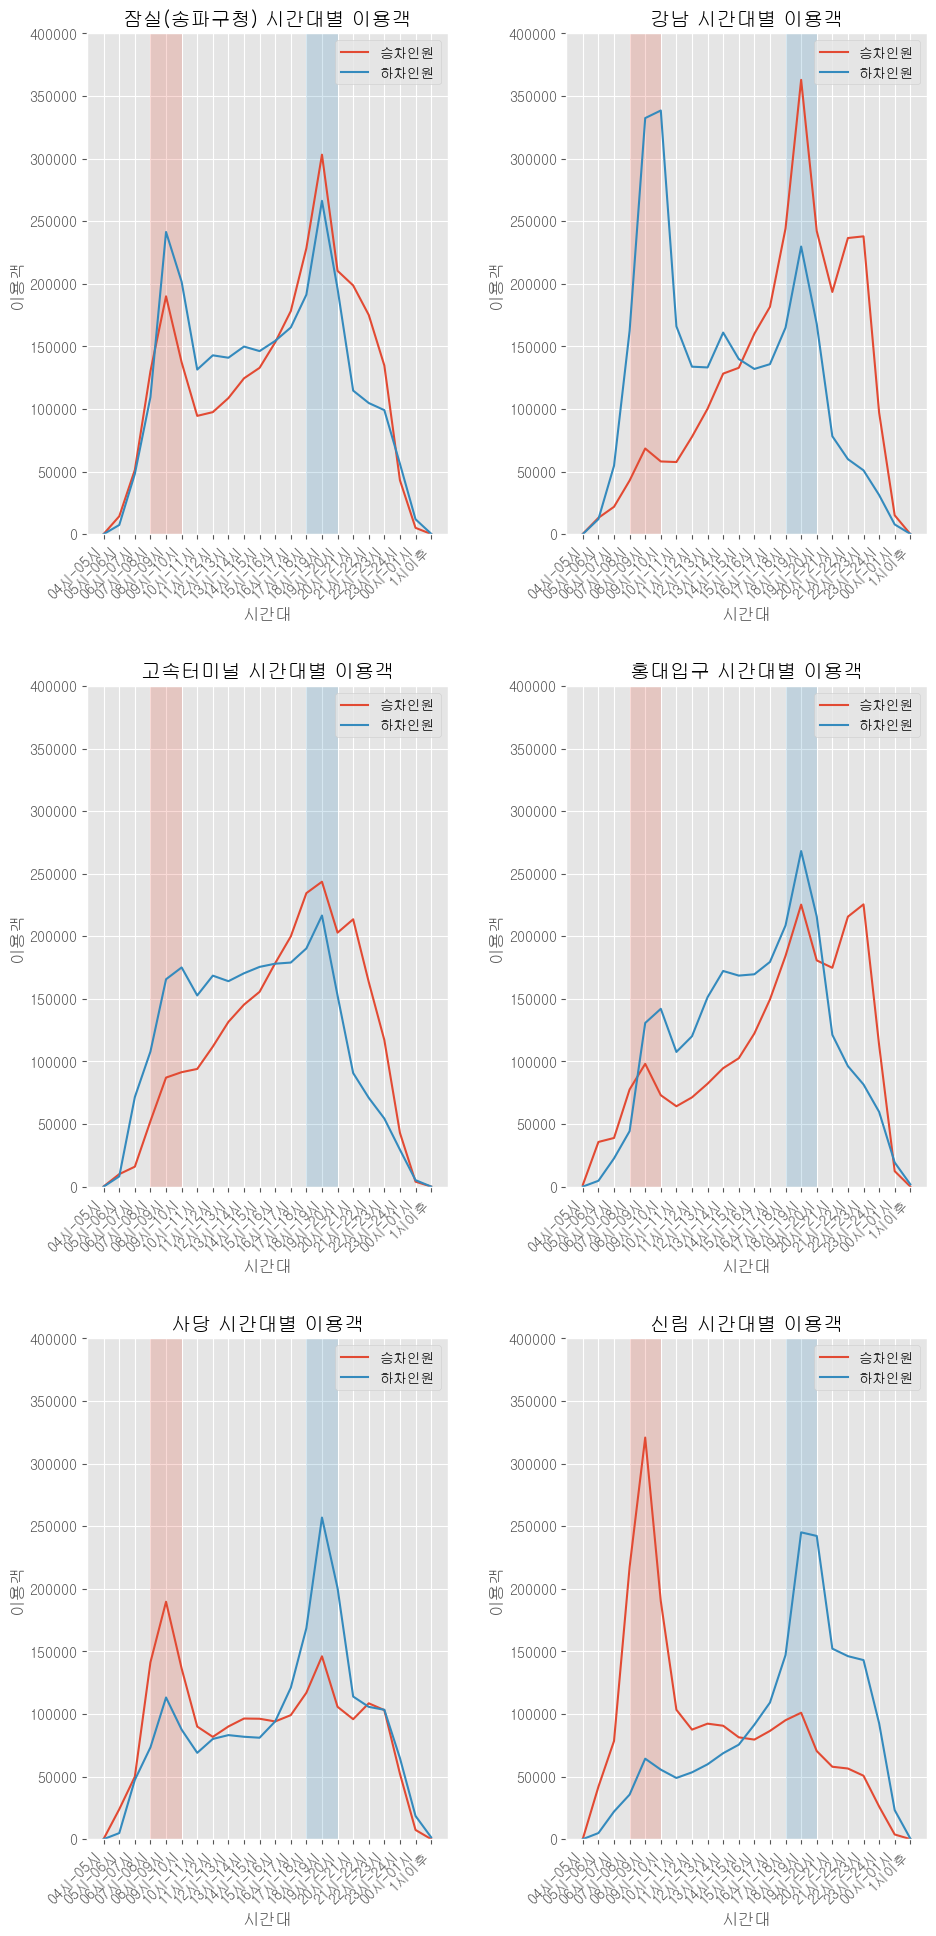

In [129]:
fig = plt.figure(figsize=(10,20))

for i in range(6):
    # 6개의 서브 플롯
    ax_i = fig.add_subplot(3,2,i+1)
    # 승차 그래프
    ax_i.plot(df_top6_in.loc[295 - i].index[2:-1].str.split(' ').str[0], df_top6_in.loc[295 - i].values[2:-1], label="승차인원")
    # 하차 그래프
    ax_i.plot(df_top6_off.loc[295 - i].index[2:-1].str.split(' ').str[0], df_top6_off.loc[295 - i].values[2:-1], label="하차인원")
    
    ax_i.set_xlabel('시간대')
    ax_i.set_ylabel('이용객')
    ax_i.set_xticks(range(len(df_top6_in.loc[295 - i].index[2:-1].str.split(' ').str[0])))
    ax_i.set_xticklabels(df_top6_in.loc[295 - i].index[2:-1].str.split(' ').str[0], rotation=45, ha='right')
    ax_i.set_title(f'{df_top6_in.loc[295 - i].values[0]} 시간대별 이용객')
    ax_i.set_ylim(0, 400000)
    ax_i.axvspan(3, 5, facecolor='#e24a33', alpha=0.2)
    ax_i.axvspan(13,15, facecolor='#348abd', alpha=0.2)
    ax_i.grid(True)
    plt.legend()
    
plt.tight_layout(pad = 3)
plt.show()

In [130]:
# 하위 6개의 데이터 시각화
Index = df_trans_fares.tail(6).index.values

In [131]:
df_bottom6 = df_trans_lower.loc[Index]

In [132]:
df_bottom6_in = df_bottom6[in_columns]

In [133]:
df_bottom6_off = df_bottom6[off_columns]

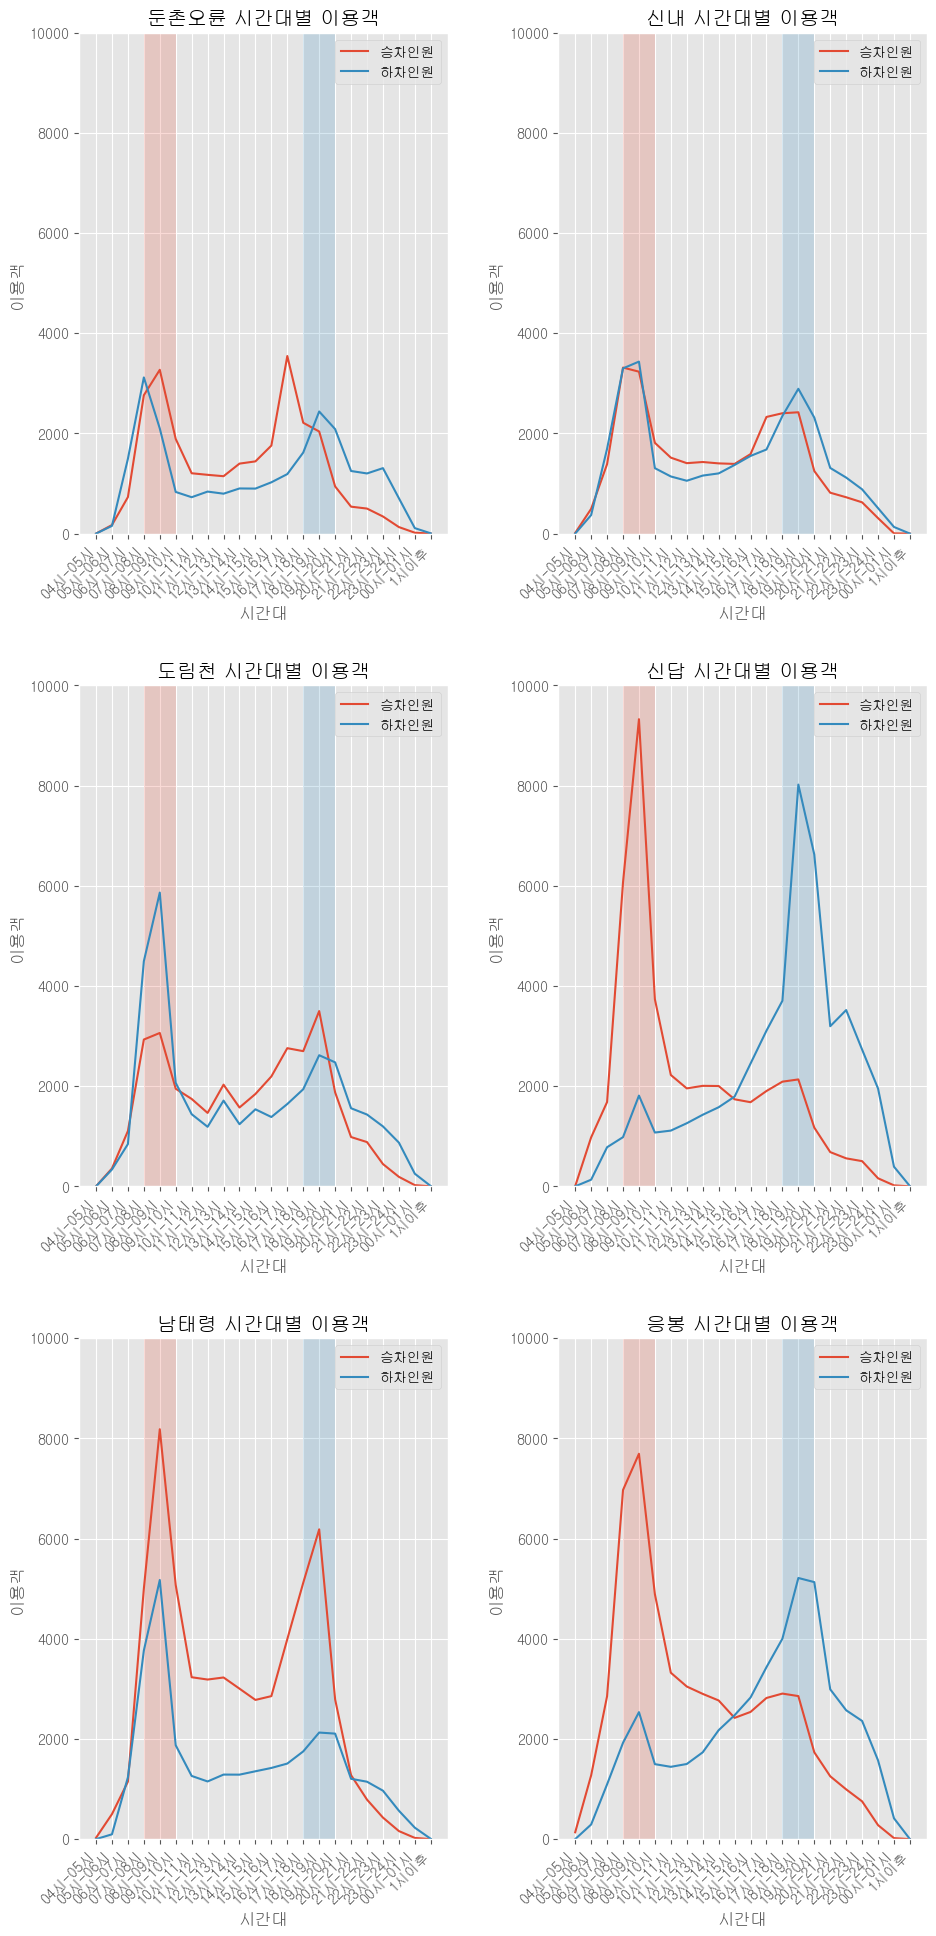

In [134]:
fig = plt.figure(figsize=(10,20))

for i in range(6):
    # 6개의 서브 플롯
    ax_i = fig.add_subplot(3,2,i+1)
    # 승차 그래프
    ax_i.plot(df_bottom6_in.loc[i].index[2:-1].str.split(' ').str[0], df_bottom6_in.loc[i].values[2:-1], label="승차인원")
    # 하차 그래프
    ax_i.plot(df_bottom6_off.loc[i].index[2:-1].str.split(' ').str[0], df_bottom6_off.loc[i].values[2:-1], label="하차인원")
    
    ax_i.set_xlabel('시간대')
    ax_i.set_ylabel('이용객')
    ax_i.set_xticks(range(len(df_bottom6_in.loc[i].index[2:-1].str.split(' ').str[0])))
    ax_i.set_xticklabels(df_bottom6_in.loc[i].index[2:-1].str.split(' ').str[0], rotation=45, ha='right')
    ax_i.set_title(f'{df_bottom6_in.loc[i].values[0]} 시간대별 이용객')
    ax_i.set_ylim(0, 10000)
    ax_i.axvspan(3, 5, facecolor='#e24a33', alpha=0.2)
    ax_i.axvspan(13,15, facecolor='#348abd', alpha=0.2)
    ax_i.grid(True)
    plt.legend()
    
plt.tight_layout(pad = 3)
plt.show()

In [135]:
# 전체 이용객 대비 상위 10개 역의 이용객의 비율 시각화
top10 = df_trans_fares.head(10)['총 이용객'].sum()
total = df_trans_fares['총 이용객'].sum()
r = total - top10

([<matplotlib.patches.Wedge at 0x2e7a18892e0>,
 [Text(0.9970977780795712, -0.46453850319298884, '이용객 상위 10개 역'),
  Text(-0.9970977563329534, 0.4645385498705038, '나머지 역')],
 [Text(0.5438715153161297, -0.2533846381052666, '13.9%'),
  Text(-0.5438715034543381, 0.2533846635657293, '86.1%')])

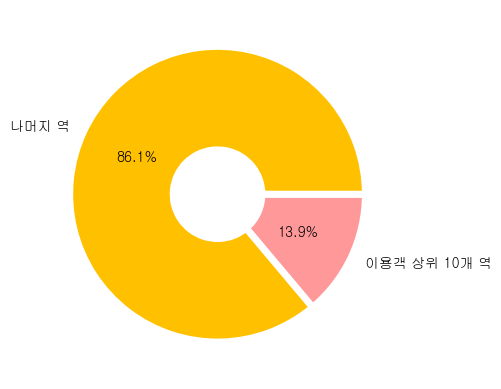

In [136]:
plt.pie([top10, r], labels = ['이용객 상위 10개 역', '나머지 역'], colors=['#ff9999', '#ffc000'], autopct='%.1f%%', startangle=0, counterclock=False,
        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})

In [138]:
# 이용객 상위 30개 역의 환승역 비율
df_trans_fares.head(30).groupby('환승가능여부')[['환승가능여부']].count().index

Index(['N', 'Y'], dtype='object', name='환승가능여부')

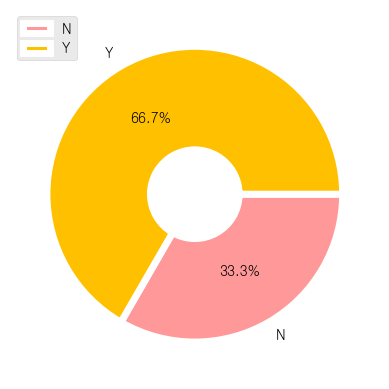

In [139]:
plt.pie(df_trans_fares.head(30).groupby('환승가능여부')[['환승가능여부']].count()['환승가능여부'], labels = df_trans_fares.head(30).groupby('환승가능여부')[['환승가능여부']].count().index, autopct='%.1f%%', startangle=0, counterclock=False, 
        colors=['#ff9999', '#ffc000'],
        wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5})
plt.legend(loc='upper left')

# 지하철 구조 분석

## 1. 전처리

In [140]:
org = pd.read_csv("./서울교통공사_역사건축정보_20210628.csv", encoding="cp949")
org1 = pd.read_csv("./국가철도공단_수도권1호선_역구조_데이터_20221013.csv", encoding="cp949")
org1.head()

,철도운영기관명,선명,역명,지상구분,역층,면적
0,서울교통공사,1호선,동대문,지하,2,3400.0
1,서울교통공사,1호선,동대문,지하,1,2090.0
2,서울교통공사,1호선,동묘앞,지하,2,5132.0
3,서울교통공사,1호선,동묘앞,지하,1,5132.0
4,서울교통공사,1호선,서울역,지하,1,8725.0


In [141]:
org1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   철도운영기관명  205 non-null    object 
 1   선명       205 non-null    object 
 2   역명       205 non-null    object 
 3   지상구분     205 non-null    object 
 4   역층       205 non-null    int64  
 5   면적       90 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 9.7+ KB


In [142]:
# 필요한 컬럼만 추출
org = org[['역명', '면적(m²)', '층수']]
org1 = org1[['역명', '면적', '역층']]

In [143]:
# 역명 중복확인
org['역명'].nunique()

259

In [144]:
org[org.duplicated('역명')]

,역명,면적(m²),층수
10,시청,12561.0,B3
56,신설동,4952.4,B2
70,종로3가,14829.9,B4
71,을지로3가,9958.0,B3
81,교대,9927.9,B3
106,동대문,8218.3,B4
107,동대문역사문화공원,14688.8,B3
108,충무로,12930.3,B3
111,서울,9564.0,B2
118,사당,10637.0,B3


In [145]:
org['층수'].unique()

array(['B2', '5FB2', 'B3', '2F', '3F', '1F', 'B1', '2FB3', 'B4', '4F',
       '1FB5', '2FB2', 'B5', 'B6', 'B8', '1FB2', '1FB3', '2FB1'],
      dtype=object)

In [146]:
org['층수'].replace({'B2':2, '5FB2':7, 'B3':3, '2F':2, '3F':3, '1F':1, 'B1':1, '2FB3':5, 'B4':4, '4F':4,
       '1FB5':6, '2FB2':4, 'B5':5, 'B6':6, 'B8':8, '1FB2':3, '1FB3':4, '2FB1':3}, inplace=True)

In [147]:
org1['역층'].unique()

array([2, 1, 3, 4], dtype=int64)

In [148]:
# 역별 총 면적, 층수
org_floor = org.groupby('역명')[['층수']].sum()
org = org.groupby('역명').sum()
org1_floor = org1.groupby('역명')[['역층']].max()
org1 = org1.groupby('역명').sum()

In [149]:
org1.drop(columns='역층', inplace=True)

In [150]:
org['층수'] = org_floor
org1['층수'] = org1_floor

In [151]:
org.reset_index(inplace=True)
org1.reset_index(inplace=True)

In [152]:
org.columns = ['지하철역', '면적', '층수']
org1.columns = ['지하철역', '면적', '층수']

In [153]:
# org와 겹치는 org1의 역데이터는 삭제
for i in org['지하철역']:
    if len(org1[org1['지하철역'].str.contains(i)]) != 0:
        index = org[org['지하철역'] == i].index
        area = org.loc[index, '면적']
        if float(area) == 0:
            org.loc[index, :] = org1[org1['지하철역'] == i]
        else:
            org1.drop(index=org1[org1['지하철역'] == i].index, inplace=True)

In [154]:
# 면적 정보가 없는 역 삭제
org1.drop(index = org1[org1['면적'] == 0].index, inplace=True)

In [155]:
org = pd.concat([org, org1], ignore_index=True)

## 2. 환승역 후보 조건 추출

In [156]:
df_trans_fares['면적'] = 0
df_trans_fares['층수'] = 0
for i in org.index:
    index = df_trans_fares[df_trans_fares['지하철역'].str.contains(org['지하철역'][i])].index
    if len(index) >= 1:
        for j in index:
            if df_trans_fares['지하철역'][j] == org['지하철역'][i]:
                index = j
            
        df_trans_fares.loc[index, '면적'] = org.loc[i, '면적']
        df_trans_fares.loc[index, '층수'] = org.loc[i, '층수']

C:\Users\user\AppData\Local\Temp\ipykernel_13048\3462918896.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  index = df_trans_fares[df_trans_fares['지하철역'].str.contains(org['지하철역'][i])].index


In [158]:
# 역사 정보가 빠진 역의 역사정보 로드
org2 = pd.read_csv("./국가철도공단_코레일_역구조_데이터_20220920.csv", encoding="cp949")

In [159]:
org2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   철도운영기관명  539 non-null    object 
 1   선명       539 non-null    object 
 2   역명       539 non-null    object 
 3   지상구분     539 non-null    object 
 4   역층       539 non-null    int64  
 5   면적       108 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 25.4+ KB


In [160]:
org2['역층'].unique()

array([2, 1, 3, 4, 5, 6], dtype=int64)

In [161]:
for i in org2['역명'].unique():
    if len(df_trans_fares[df_trans_fares['층수'] == 0]['지하철역'].str.contains(i)) > 0:
        index = df_trans_fares[df_trans_fares['층수'] == 0]['지하철역'].str.contains(i).index
        floor = org2[org2['역명'] == i]['역층'].max()
        area = org2[org2['역명'] == i]['면적'].sum()
        df_trans_fares.loc[index, '층수'] = floor
        df_trans_fares.loc[index, '면적'] = area

C:\Users\user\AppData\Local\Temp\ipykernel_13048\559199638.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  if len(df_trans_fares[df_trans_fares['층수'] == 0]['지하철역'].str.contains(i)) > 0:


In [162]:
# 면적의 결측치는 이용객수가 비슷한 역들(위, 아래)의 평균으로 대체
for i in df_trans_fares[df_trans_fares['면적'] == 0].index:
    k = 1
    while k < 5 :
        if df_trans_fares.loc[i+k, '면적'] == 0:
            k += 1
        else:
            break
    df_trans_fares.loc[i, '면적'] = (df_trans_fares.loc[i-1, '면적'] + df_trans_fares.loc[i+k, '면적'])/2

In [163]:
df_trans_fares[df_trans_fares['환승가능여부'] == 'Y'][['면적']].describe()

,면적
count,68.000000
mean,15994.421324
std,7460.046335
min,1069.500000
25%,10209.725000
50%,15581.000000
75%,21125.850000
max,33328.900000


In [164]:
df_trans_fares[df_trans_fares['환승가능여부'] == 'Y'][['층수']].describe()

,층수
count,68.000000
mean,4.676471
std,2.154074
min,2.000000
25%,3.000000
50%,5.000000
75%,6.000000
max,11.000000


In [165]:
# 환승역이 될 조건1
condition_1 = df_trans_fares[df_trans_fares['환승가능여부'] == 'Y'][['면적']].quantile(q=0.25).values[0]


10209.724999999999

In [166]:
# 환승역이 될 조건2
condition_2 = df_trans_fares[df_trans_fares['환승가능여부'] == 'Y'][['층수']].quantile(q=0.25).values[0]

In [167]:
candidate = df_trans_fares[(df_trans_fares['면적'] >= condition_1) & (df_trans_fares['환승가능여부'] == 'N')]

In [168]:
candidate = candidate[candidate['층수'] >= condition_2]

In [169]:
candidate.to_csv('환승역 후보.csv', index=False)

In [170]:
candidate

,지하철역,환승가능여부,출근시간대 승차,출근시간대 하차,퇴근시간대 승차,퇴근시간대 하차,유임이용객,무임이용객,총 이용객,유임이용객 비율,무임이용객 비율,면적,층수
270,강변(동서울터미널),N,310965.850000,137473.333333,218915.200000,335019.900000,2.096152e+06,248150.700000,2.344303e+06,0.894,0.106,20369.0,4
252,남부터미널(예술의전당),N,108930.433333,312847.816667,315726.016667,179654.566667,1.648329e+06,230358.416667,1.878687e+06,0.877,0.123,14336.5,3
239,회현(남대문시장),N,28313.100000,304034.433333,293064.650000,61529.416667,1.245850e+06,361258.166667,1.607108e+06,0.775,0.225,12024.8,4
229,오목교(목동운동장앞),N,139248.916667,160058.266667,169119.200000,191894.733333,1.232900e+06,156258.450000,1.389159e+06,0.888,0.112,12405.2,3
225,안국,N,26037.116667,274596.416667,269722.400000,68796.766667,1.147111e+06,197556.583333,1.344668e+06,0.853,0.147,11076.6,3
221,경복궁(정부서울청사),N,57811.666667,230447.366667,225597.516667,95122.000000,1.154223e+06,162846.900000,1.317069e+06,0.876,0.124,20369.0,4
213,청담,N,41856.433333,314077.066667,227509.233333,64166.883333,1.031620e+06,133631.383333,1.165252e+06,0.885,0.115,20302.8,4
209,논현,N,41065.616667,261155.283333,208474.966667,89646.283333,1.035277e+06,95508.133333,1.130785e+06,0.916,0.084,11834.6,3
201,강동,N,183715.850000,90114.566667,108194.850000,133021.516667,8.656845e+05,180396.150000,1.046081e+06,0.828,0.172,18984.6,4
153,상왕십리,N,128909.516667,67385.383333,72190.100000,108467.350000,6.414789e+05,124748.116667,7.662270e+05,0.837,0.163,25983.4,7
